<html>

<head>
<meta charset="UTF-8">
<title>Title of the document</title>
</head>

<body>
<h1 id="title">Plots from X-ray absorption calculations using ORCA</h1>
<p>Presentation of the feature engineering applied for ORCA outputs</p>
<p>Data presented here, as new inputs for this jupyter-notebook, comes from the written-shell pipeline created to extract X-ray excited-state features from some specific pair of atoms group (e.g. pair amino acid).</p>
<p>Outputs here are filtered features that account for specific transitions (coreMO -> virtualMO) for the specific pair of atoms group.</p>
</body>
</html>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import csv as csv
from matplotlib.colors import  ListedColormap
from matplotlib.pyplot import figure
from __future__ import print_function
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import math

____________________________

In [2]:
from scipy.optimize import leastsq
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

In [3]:
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 18

--------------

<html>

<head>
<meta charset="UTF-8">
<title>Title of the document</title>
</head>

<body>
<h1 id="title">Löwdin Population analysis from </h1>
<h2 id="title"> X-ray absorption spectra calculated using PNO-DFT/ROCIS zora </h2>
<h3 id="title">    System of study: F ${---}$Y</h3>
<h4 id="title">   non-covalent interaction distances varying from 2,5 to 11,0 $\dot{A}$ </h4>
</body>
</html>


#### Loading matrices (data from the pipeline's outputs)
Data in .csv format
##### residue called as A is acting as one at the ground state amino acid
> ##### resA core MO
##### residue called as B is acting as one at the virtual state amino acid
> ##### resB virtual MO

In a pair-aa interaction, e.g. Phe-Tyr, Phenylalanine stands for resA core MO and Tyrosine for resB virtual MO. And after, Tyrosine stands for resA core MO and Phenylalanine for resB virtual MO. Both are calculated and are within the spectra.

> ##### resA core MO - Phenylalanine

In [4]:
#Uncomment the original range to see more peaks outside the expected range
resa_phe="resA_MOcore_FY_"
resa_tyr="resA_MOcore_YF_"
post=".csv"
#list_suf = [25, 26, 27, 28, 29, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110]
l_tmp = [85, 90, 95, 100, 105, 110]
list_suf = [i for i in range(25,81)]
for i in l_tmp:
    list_suf.append(i)
for ii in list_suf:
    globals()['resa_mocore_%s_FY_raw' % str(ii)] = pd.read_csv(resa_phe+str(ii)+post, delimiter=',', index_col='num-1')
    globals()['resa_mocore_%s_YF_raw' % str(ii)] = pd.read_csv(resa_tyr+str(ii)+post, delimiter=',', index_col='num-1')

resa_mocore_27_FY_raw#.head()
#resa_mocore_27_YF_raw

,sym,lvl,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
num-1,,,,,,,,,,,,,,,,,,,,
1,C,s,0.0,0.0,0.0,0.0,99.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,C,s,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.3,0.0,0.0,0.0,0.0,0.0,3.6,95.4,0.0,0.0,0.0
11,C,s,0.0,0.0,0.0,0.0,0.0,0.0,0.3,98.7,0.0,0.0,0.0,0.0,0.0,0.2,0.5,0.0,0.0,0.0
2,C,s,99.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,C,s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,99.3,0.0,0.0,0.0,0.0,0.0,0.0
6,C,s,0.0,0.0,0.0,0.0,0.0,99.5,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,C,s,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.3,0.0,0.0,0.0,0.0,0.0,95.7,3.5,0.0,0.0,0.0
8,C,s,0.0,0.0,0.0,0.0,0.0,0.1,0.9,0.0,0.0,0.0,98.4,0.2,0.0,0.0,0.0,0.0,0.0,0.0
9,C,s,0.0,0.0,0.0,0.0,0.0,0.0,98.1,0.3,0.0,0.0,0.9,0.0,0.0,0.0,0.3,0.0,0.0,0.0


> ##### resB virt MO - Tyrosine

In [5]:
resb_tyr="resB_MOcore_FY_"
resb_phe="resB_MOcore_YF_"
post=".csv"
for ii in list_suf:
    globals()['resb_movirt_%s_FY_raw' % str(ii)] = pd.read_csv(resb_tyr+str(ii)+post, delimiter=',', index_col='num-1')
    globals()['resb_movirt_%s_YF_raw' % str(ii)] = pd.read_csv(resb_phe+str(ii)+post, delimiter=',', index_col='num-1')

resb_movirt_25_YF_raw#.head()
#resb_movirt_27_YF_raw

,sym,lvl,92,93,94,95,96,97,98,99,100,101,102
num-1,,,,,,,,,,,,,
0,atom,lvlMO,0.2,0.1,0.0,3.0,0.4,0.1,0.9,0.2,0.1,4.5,2.4
1,atom,lvlMO,0.2,1.3,0.0,4.4,1.8,0.3,2.2,0.2,0.2,3.2,1.1
2,atom,lvlMO,0.1,0.9,0.4,39.3,6.5,0.2,4.7,0.1,0.7,3.4,1.8
3,atom,lvlMO,0.0,0.1,0.1,6.3,3.1,0.0,5.6,0.1,0.6,0.7,2.5
4,atom,lvlMO,0.1,0.4,0.2,20.9,2.9,0.0,1.1,0.0,0.2,0.9,1.1
5,atom,lvlMO,0.2,1.1,0.2,2.7,2.9,0.6,0.6,0.3,1.0,0.8,0.8
6,atom,lvlMO,1.2,15.0,0.8,0.8,0.3,0.1,0.5,0.0,0.4,1.2,1.1
7,atom,lvlMO,7.8,7.7,0.8,0.5,0.6,0.0,0.7,1.0,2.8,1.3,1.5
8,atom,lvlMO,13.8,2.4,0.4,0.2,2.5,0.7,0.9,0.5,0.6,2.4,1.1


<html>


<body>
<h1 id="title">Features from  X-ray excited-state properties: </h1>
<h2 id="title">1. The number of transitions </h2>
<h2 id="title">2. The transitions averaged probability </h2>
<h2 id="title">3. The oscillator strength using electronic dipole moment as operator </h2>
<h2 id="title">4. The oscillator strength using velocity dipole moment as operator </h2>
</body>
</html>

#### coreMO vs. virtual MO (core/virt MO)
#### resA(Phe) --> resB(Tyr)

> ### 1. core/virt MO as function of the number of transitions

In [6]:
resab_fy="corevirtMO_matrix_FY_"#same as YF
post=".csv"
for ii in list_suf:
    globals()['corevirtMO_matrix_%s_FY_raw' % str(ii)] = pd.read_csv(resab_fy+str(ii)+post, delimiter=',', index_col='virt\core')

corevirtMO_matrix_27_FY_raw.head()

,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
virt\core,,,,,,,,,,,,,,,,,,
92,3,2,5,1,1,1,4,3,1,4,2,1,4,2,5,4,3,4
93,5,2,5,1,2,1,5,4,1,3,4,1,4,4,4,4,4,2
94,5,3,5,1,2,1,6,5,2,5,4,2,4,4,4,4,3,3
95,5,4,5,1,1,1,5,5,2,5,4,3,4,4,4,6,4,2
96,5,3,4,1,1,1,4,4,1,3,4,2,3,4,5,3,3,3


> ### 2. core/virt MO as function of the number of transitions averaged probability

In [7]:
resab_ts_fy="corevirtMO_matrix_tspb_FY_"#same as YF
post=".csv"
for ii in list_suf:
    globals()['corevirtMO_matrix_tspb_%s_FY_raw' % str(ii)] = pd.read_csv(resab_ts_fy+str(ii)+post, delimiter=',', index_col='virt\core')

corevirtMO_matrix_tspb_27_FY_raw.head()

,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
virt\core,,,,,,,,,,,,,,,,,,
92,0.964431,0.995124,0.690136,1.0000,0.999900,0.9861,0.766264,0.676802,0.987300,0.391690,0.928102,0.990200,0.378527,0.787747,0.545323,0.736163,0.865087,0.759381
93,0.812692,0.995173,0.857595,0.9998,0.784765,0.9792,0.432482,0.433563,0.991500,0.648244,0.628927,0.990400,0.714518,0.594089,0.737243,0.710394,0.881651,0.866695
94,0.929029,0.955010,0.758110,0.9996,0.780886,0.9779,0.679528,0.657357,0.969614,0.461647,0.865679,0.909570,0.516176,0.711232,0.596234,0.710248,0.869623,0.869411
95,0.795789,0.942724,0.924045,0.9999,0.994500,0.9810,0.576890,0.580539,0.921219,0.390637,0.588161,0.884957,0.848254,0.502159,0.363824,0.626902,0.896139,0.924894
96,0.783154,0.977725,0.854252,1.0000,0.999900,0.9893,0.853071,0.846454,0.986600,0.520040,0.559946,0.955212,0.707240,0.440847,0.815327,0.511699,0.698975,0.945226


> ### 3. core/virt MO as function of the oscillator strength using electronic dipole moment as operator
> #### by weighted (WSM) sum and weighted average (WAM)

In [8]:
resab_fosce_fy="corevirt_fosce_FY_"#same as YF
resab_foscwe_fy="corevirt_foscwe_FY_"
post=".csv"
for ii in list_suf:
    globals()['corevirt_mo_fosce_%s_FY_raw' % str(ii)] = pd.read_csv(resab_fosce_fy+str(ii)+post, delimiter=',', index_col='virt\core')
    globals()['corevirt_mo_foscwe_%s_FY_raw' % str(ii)] = pd.read_csv(resab_foscwe_fy+str(ii)+post, delimiter=',', index_col='virt\core')

corevirt_mo_fosce_27_FY_raw.head()

,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
virt\core,,,,,,,,,,,,,,,,,,
92,0.018949,0.000166,0.000044,1.935600e-05,0.000021,0.128511,0.000900,0.000915,0.000032,0.000022,0.018937,0.000162,0.000037,0.014804,0.006039,0.000052,0.000366,0.000158
93,0.059236,0.000026,0.000012,2.028590e-06,0.000068,0.117189,0.002221,0.000749,0.000003,0.000008,0.059228,0.000025,0.000012,0.040093,0.004191,0.000010,0.000047,0.000012
94,0.003954,0.030486,0.000032,1.415330e-05,0.000184,0.140934,0.000166,0.000088,0.000021,0.000016,0.003701,0.030482,0.000018,0.004430,0.000482,0.000026,0.000135,0.000028
95,0.039109,0.002735,0.000073,6.009400e-07,0.000016,0.004856,0.003237,0.000721,0.000014,0.000682,0.039073,0.002735,0.000072,0.020028,0.004286,0.000142,0.000023,0.000004
96,0.178812,0.000446,0.000049,1.540000e-06,0.000002,0.000745,0.010363,0.002904,0.000003,0.000029,0.178810,0.000443,0.000042,0.152670,0.011721,0.000024,0.000028,0.000075


> ### 4. core/virt MO as function of the oscillator strength using velocity dipole moment as operator
> #### by weighted (WSM) sum and weighted average (WAM)

In [9]:
resab_foscv_fy="corevirt_foscv_FY_"#same as YF
resab_foscwv_fy="corevirt_foscwv_FY_"
post=".csv"
for ii in list_suf:
    globals()['corevirt_mo_foscv_%s_FY_raw' % str(ii)] = pd.read_csv(resab_foscv_fy+str(ii)+post, delimiter=',', index_col='virt\core')
    globals()['corevirt_mo_foscwv_%s_FY_raw' % str(ii)] = pd.read_csv(resab_foscwv_fy+str(ii)+post, delimiter=',', index_col='virt\core')

corevirt_mo_foscv_27_FY_raw.head()

,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
virt\core,,,,,,,,,,,,,,,,,,
92,0.017937,0.000082,0.000057,3.075500e-05,0.000017,0.120655,0.000841,0.000842,0.000083,0.000034,0.017924,0.000076,0.000050,0.014056,0.005557,0.000052,0.000378,0.000152
93,0.058646,0.000006,0.000014,2.630470e-06,0.000064,0.109963,0.002106,0.000678,0.000004,0.000009,0.058636,0.000005,0.000014,0.038213,0.003987,0.000008,0.000060,0.000013
94,0.003877,0.025084,0.000047,1.693420e-05,0.000152,0.132422,0.000185,0.000090,0.000035,0.000024,0.003669,0.025077,0.000026,0.004293,0.000464,0.000041,0.000197,0.000046
95,0.040636,0.002394,0.000078,7.849220e-07,0.000011,0.004755,0.003404,0.000736,0.000019,0.000640,0.040605,0.002394,0.000077,0.019750,0.004240,0.000134,0.000019,0.000004
96,0.182143,0.000421,0.000033,2.052000e-06,0.000003,0.000845,0.009109,0.002157,0.000004,0.000038,0.182141,0.000417,0.000029,0.155690,0.011873,0.000026,0.000035,0.000079


### Main functions to present data according to the features

In [10]:
def selecting_atm_matrix(df, atoms_list):
    """
    it returns MO matrix (df) having just the atoms in atoms_list.
    """
    col_list = df.index.tolist() #listing index (elements from column 0)
    #dff = df.loc[:, (df != 0).any(axis=0)] #removing zero columns
    return df.loc[[i for i in atoms_list if i in col_list]] #returning just columns in the both lists intersection
#atoms_core=resa_mocore_GFG9Y_raw.index.tolist() #all C-core atoms
#[i for i in atoms_a if i in atoms_core] #atoms_a intersection atoms_core

In [11]:
def nonzero_mo_matrix(df):
    """
    it returns MO matrix (df) having just non-zero MO population.
    """
    return df.loc[:, (df != 0).any(axis=0)] #removing zero columns

In [12]:
def crop_by_loewdin_p(df,pop):
    """
    it returns MO matrix (df) having just a Loewdin MO population contribution greater than (100*pop)%.
    pop is a number between 0 and 1.
    """
    cols = [col for col, val in df.sum()[2:].iteritems() if val > (pop*100)]
    #iteritem() create a zip with the index_col and the values
    cols.insert(0,'lvl')
    cols.insert(0,'sym')
    #to add on the top the first two columns removed in the previous sum() evaluation
    return df[cols] #showing the fisrt two columns and those having population greater than pop*100%

In [13]:
def cropping_matrix(df, df1, df2):
    """
    it returns a cropped MO matrix from df using as parameters the indices in df1 and df2.
    df1 index are column names from df and df2 index are the rows from df
    """
    try:
        dff = df[df1.axes[1][2:].tolist()] #saving specific columns
    except KeyError:
        tmp_mo = [item for item in df1.axes[1][2:].tolist() if item in df.axes[1][2:].tolist()]
        #removing items in the first list that are not in the second one
        dff = df[tmp_mo]
    try:
        return dff.loc[[int(i) for i in df2.axes[1][2:].tolist()]] #returning specific rows
    except KeyError:
        tmp_mo2 = [item for item in df2.axes[1][2:].tolist() if item in dff.T.axes[1][2:].tolist()]
        # dff.T to obtain the index_col as the head row
        return dff.loc[[int(i) for i in tmp_mo2]] #returning specific rows
# the first two elements in df2.axes[1] and df1.axes[1] are "sym" and "lvl", that's why I used df.axes[1][2:]

<html>


<body>
<h3 id="title">Reducing Löwdin Population MO matrices by removing non-contributing MO</h3>
<h4> Case for core MO in the resA</h4>
</body>
</html>

In [14]:
for ii in list_suf:
    globals()['resa_mocore_%s_FY' % str(ii)] = nonzero_mo_matrix(globals()['resa_mocore_%s_FY_raw' % str(ii)])
    globals()['resa_mocore_%s_YF' % str(ii)] = nonzero_mo_matrix(globals()['resa_mocore_%s_YF_raw' % str(ii)])

resa_mocore_27_FY.head()
#resa_mocore_27_YF.head()

,sym,lvl,7,11,12,13,14,17,18,20,21
num-1,,,,,,,,,,,
1,C,s,0.0,99.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,C,s,0.0,0.0,0.0,0.3,0.3,0.0,0.0,3.6,95.4
11,C,s,0.0,0.0,0.0,0.3,98.7,0.0,0.0,0.2,0.5
2,C,s,99.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,C,s,0.0,0.0,0.0,0.0,0.0,0.2,99.3,0.0,0.0


<html>

<body>
<h4> Case for virtual MO in the resB</h4>
</body>
</html>
<html>

In [15]:
for ii in list_suf:
    globals()['resb_movirt_%s_FY' % str(ii)] = nonzero_mo_matrix(globals()['resb_movirt_%s_FY_raw' % str(ii)])
    globals()['resb_movirt_%s_YF' % str(ii)] = nonzero_mo_matrix(globals()['resb_movirt_%s_YF_raw' % str(ii)])

resb_movirt_27_FY#.head()
#resb_movirt_27_YF#.head()

,sym,lvl,92,93,94,95,96,97,98,99,100,101,102,103
num-1,,,,,,,,,,,,,,
23,atom,lvlMO,0.0,0.0,0.0,0.0,0.9,2.9,0.6,1.2,3.2,0.6,1.3,1.2
24,atom,lvlMO,0.4,0.8,0.0,0.0,2.2,3.8,1.5,1.7,3.8,1.1,0.5,1.9
25,atom,lvlMO,0.2,0.0,0.0,0.0,1.2,22.2,7.7,12.8,1.3,2.1,3.0,3.5
26,atom,lvlMO,0.0,0.0,0.0,0.0,0.3,10.1,3.7,5.8,0.5,0.8,1.8,1.4
27,atom,lvlMO,0.0,0.0,0.0,0.0,0.4,7.5,2.7,7.7,0.5,0.5,0.8,0.8
28,atom,lvlMO,0.3,0.9,0.1,0.0,2.2,2.7,0.9,0.9,1.3,0.3,1.8,0.7
29,atom,lvlMO,1.1,9.6,0.4,0.7,0.5,0.4,0.5,0.4,1.2,2.6,1.2,1.0
30,atom,lvlMO,8.3,7.0,0.5,0.0,0.9,0.8,1.0,1.1,4.3,1.2,3.4,1.8
31,atom,lvlMO,13.0,1.6,0.0,0.8,2.6,0.5,2.4,1.4,0.5,0.8,7.3,5.0


<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h4 id="title">Reducing further resB Löwdin Population MO by just considering upper 67% population contribution</h4>
</body>
</html>

In [16]:
#for counting transitions in MO having greater than 67% of Loewdin population contribution in resB
pop = 0.20
for ii in list_suf:
    globals()['resb_movirt_%s_FY_pop' % str(ii)] = crop_by_loewdin_p(globals()['resb_movirt_%s_FY_raw' % str(ii)],pop)
    globals()['resb_movirt_%s_YF_pop' % str(ii)] = crop_by_loewdin_p(globals()['resb_movirt_%s_YF_raw' % str(ii)],pop)

resb_movirt_27_FY_pop#.head()
#resb_movirt_27_YF_pop.head()

,sym,lvl,92,93,94,96,97,98,99,100,101,102,103
num-1,,,,,,,,,,,,,
23,atom,lvlMO,0.0,0.0,0.0,0.9,2.9,0.6,1.2,3.2,0.6,1.3,1.2
24,atom,lvlMO,0.4,0.8,0.0,2.2,3.8,1.5,1.7,3.8,1.1,0.5,1.9
25,atom,lvlMO,0.2,0.0,0.0,1.2,22.2,7.7,12.8,1.3,2.1,3.0,3.5
26,atom,lvlMO,0.0,0.0,0.0,0.3,10.1,3.7,5.8,0.5,0.8,1.8,1.4
27,atom,lvlMO,0.0,0.0,0.0,0.4,7.5,2.7,7.7,0.5,0.5,0.8,0.8
28,atom,lvlMO,0.3,0.9,0.1,2.2,2.7,0.9,0.9,1.3,0.3,1.8,0.7
29,atom,lvlMO,1.1,9.6,0.4,0.5,0.4,0.5,0.4,1.2,2.6,1.2,1.0
30,atom,lvlMO,8.3,7.0,0.5,0.9,0.8,1.0,1.1,4.3,1.2,3.4,1.8
31,atom,lvlMO,13.0,1.6,0.0,2.6,0.5,2.4,1.4,0.5,0.8,7.3,5.0


In [17]:
#[int(i) for i in resb_movirt_G5FG5Y.axes[1][2:].tolist()]

<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h3 id="title">Cropping core virtual MO matrices by resA and resB matrices boundaries:</h3>
</body>
</html>

> ### 1st. feature: core/virt MO as function of the number of transitions

<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h4 id="title">resA and resB having just contributing MO</h4>
</body>
</html>

In [18]:
for ii in list_suf:
    globals()['core_virt_mo_%s_FY' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY' % str(ii)])
    globals()['core_virt_mo_%s_YF' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF' % str(ii)])

core_virt_mo_27_FY.head()
#core_virt_mo_27_YF.head()

,7,11,12,13,14,17,18,20,21
virt\core,,,,,,,,,
92,3,1,1,4,3,2,1,2,5
93,5,2,1,5,4,4,1,4,4
94,5,2,1,6,5,4,2,4,4
95,5,1,1,5,5,4,3,4,4
96,5,1,1,4,4,4,2,4,5


<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h4 id="title">resA and resB, when resB has just upper a set percentage of MO contribution</h4>
</body>
</html>

In [19]:
for ii in list_suf:
    globals()['core_virt_mo_%s_FY_pop' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY_pop' % str(ii)])
    globals()['core_virt_mo_%s_YF_pop' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF_pop' % str(ii)])

core_virt_mo_27_FY_pop.head()
#core_virt_mo_27_YF_pop.head()

,7,11,12,13,14,17,18,20,21
virt\core,,,,,,,,,
92,3,1,1,4,3,2,1,2,5
93,5,2,1,5,4,4,1,4,4
94,5,2,1,6,5,4,2,4,4
96,5,1,1,4,4,4,2,4,5
97,4,1,1,3,4,3,1,3,4


> ### 2nd. feature: core/virt MO as function of the number of transitions averaged probability

<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h4 id="title">resA and resB having just contributing MO</h4>
</body>
</html>

In [20]:
for ii in list_suf:
    globals()['corevirtMO_matrix_tspb_%s_FY' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_tspb_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY' % str(ii)])
    globals()['corevirtMO_matrix_tspb_%s_YF' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_tspb_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF' % str(ii)])

corevirtMO_matrix_tspb_27_FY.head()
#corevirtMO_matrix_tspb_27_YF.head()

,7,11,12,13,14,17,18,20,21
virt\core,,,,,,,,,
92,0.964431,0.999900,0.9861,0.766264,0.676802,0.928102,0.990200,0.787747,0.545323
93,0.812692,0.784765,0.9792,0.432482,0.433563,0.628927,0.990400,0.594089,0.737243
94,0.929029,0.780886,0.9779,0.679528,0.657357,0.865679,0.909570,0.711232,0.596234
95,0.795789,0.994500,0.9810,0.576890,0.580539,0.588161,0.884957,0.502159,0.363824
96,0.783154,0.999900,0.9893,0.853071,0.846454,0.559946,0.955212,0.440847,0.815327


<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h4 id="title">resA and resB, when resB has just upper a set percentage of MO contribution</h4>
</body>
</html>

In [21]:
for ii in list_suf:
    globals()['corevirtMO_matrix_tspb_%s_FY_pop' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_tspb_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY_pop' % str(ii)])
    globals()['corevirtMO_matrix_tspb_%s_YF_pop' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_tspb_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF_pop' % str(ii)])

corevirtMO_matrix_tspb_27_FY_pop.head()
#corevirtMO_matrix_tspb_27_YF_pop.head()

,7,11,12,13,14,17,18,20,21
virt\core,,,,,,,,,
92,0.964431,0.999900,0.9861,0.766264,0.676802,0.928102,0.990200,0.787747,0.545323
93,0.812692,0.784765,0.9792,0.432482,0.433563,0.628927,0.990400,0.594089,0.737243
94,0.929029,0.780886,0.9779,0.679528,0.657357,0.865679,0.909570,0.711232,0.596234
96,0.783154,0.999900,0.9893,0.853071,0.846454,0.559946,0.955212,0.440847,0.815327
97,0.695209,0.999700,0.9850,0.882561,0.836803,0.384489,0.990300,0.476461,0.654523


> ### 3. core/virt MO as function of the oscillator strength using electronic dipole moment as operator
> #### by weighted (WSM) sum and weighted average (WAM)

<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h4 id="title">resA and resB having just contributing MO</h4>
</body>
</html>

In [22]:
for ii in list_suf:
    globals()['corevirt_mo_fosce_%s_FY' % str(ii)] = cropping_matrix(globals()['corevirt_mo_fosce_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY' % str(ii)])
    globals()['corevirt_mo_fosce_%s_YF' % str(ii)] = cropping_matrix(globals()['corevirt_mo_fosce_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF' % str(ii)])
    globals()['corevirt_mo_foscwe_%s_FY' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwe_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY' % str(ii)])
    globals()['corevirt_mo_foscwe_%s_YF' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwe_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF' % str(ii)])

corevirt_mo_fosce_27_FY.head()
#corevirt_mo_fosce_27_YF.head()

,7,11,12,13,14,17,18,20,21
virt\core,,,,,,,,,
92,0.018949,0.000021,0.128511,0.000900,0.000915,0.018937,0.000162,0.014804,0.006039
93,0.059236,0.000068,0.117189,0.002221,0.000749,0.059228,0.000025,0.040093,0.004191
94,0.003954,0.000184,0.140934,0.000166,0.000088,0.003701,0.030482,0.004430,0.000482
95,0.039109,0.000016,0.004856,0.003237,0.000721,0.039073,0.002735,0.020028,0.004286
96,0.178812,0.000002,0.000745,0.010363,0.002904,0.178810,0.000443,0.152670,0.011721


<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h4 id="title">resA and resB, when resB has just upper a set percentage of MO contribution</h4>
</body>
</html>

In [23]:
for ii in list_suf:
    globals()['corevirt_mo_fosce_%s_FY_pop' % str(ii)] = cropping_matrix(globals()['corevirt_mo_fosce_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY_pop' % str(ii)])
    globals()['corevirt_mo_fosce_%s_YF_pop' % str(ii)] = cropping_matrix(globals()['corevirt_mo_fosce_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF_pop' % str(ii)])
    globals()['corevirt_mo_foscwe_%s_FY_pop' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwe_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY_pop' % str(ii)])
    globals()['corevirt_mo_foscwe_%s_YF_pop' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwe_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF_pop' % str(ii)])    

corevirt_mo_fosce_27_FY_pop.head()
#corevirt_mo_fosce_27_YF_pop.head()

,7,11,12,13,14,17,18,20,21
virt\core,,,,,,,,,
92,0.018949,0.000021,0.128511,0.000900,0.000915,0.018937,0.000162,0.014804,0.006039
93,0.059236,0.000068,0.117189,0.002221,0.000749,0.059228,0.000025,0.040093,0.004191
94,0.003954,0.000184,0.140934,0.000166,0.000088,0.003701,0.030482,0.004430,0.000482
96,0.178812,0.000002,0.000745,0.010363,0.002904,0.178810,0.000443,0.152670,0.011721
97,0.137722,0.000068,0.011673,0.001009,0.000266,0.137712,0.000184,0.080315,0.009473


> ### 4. core/virt MO as function of the oscillator strength using velocity dipole moment as operator
> #### by weighted (WSM) sum and weighted average (WAM)

<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h4 id="title">resA and resB having just contributing MO</h4>
</body>
</html>

In [24]:
for ii in list_suf:
    globals()['corevirt_mo_foscv_%s_FY' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscv_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY' % str(ii)])
    globals()['corevirt_mo_foscv_%s_YF' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscv_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF' % str(ii)])
    globals()['corevirt_mo_foscwv_%s_FY' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwv_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY' % str(ii)])
    globals()['corevirt_mo_foscwv_%s_YF' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwv_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF' % str(ii)])    

corevirt_mo_foscv_25_FY.head()
#corevirt_mo_foscv_27_YF.head()

,7,11,12,13,14,16,19,20,21,23
virt\core,,,,,,,,,,
92,0.000119,0.000020,0.131329,0.000772,0.000058,0.022946,0.000242,0.000029,0.004806,0.002469
93,0.000024,0.000017,0.119661,0.001143,0.000450,0.060581,0.000010,0.000166,0.034418,0.000389
94,0.000241,0.000176,0.131222,0.000170,0.000099,0.004825,0.000088,0.022291,0.003591,0.000103
95,0.000141,0.000010,0.003697,0.002346,0.000263,0.058623,0.000013,0.001303,0.008972,0.000544
96,0.000114,0.000011,0.013905,0.011278,0.000552,0.222451,0.000019,0.000025,0.000279,0.000095


<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h4 id="title">resA and resB, when resB has just upper a set percentage of MO contribution</h4>
</body>
</html>

In [25]:
for ii in list_suf:
    globals()['corevirt_mo_foscv_%s_FY_pop' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscv_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY_pop' % str(ii)])
    globals()['corevirt_mo_foscv_%s_YF_pop' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscv_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF_pop' % str(ii)])
    globals()['corevirt_mo_foscwv_%s_FY_pop' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwv_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY_pop' % str(ii)])
    globals()['corevirt_mo_foscwv_%s_YF_pop' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwv_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF_pop' % str(ii)])    

corevirt_mo_foscv_25_FY_pop.head()
#corevirt_mo_foscv_27_YF_pop.head()

,7,11,12,13,14,16,19,20,21,23
virt\core,,,,,,,,,,
92,0.000119,0.000020,0.131329,0.000772,0.000058,0.022946,0.000242,0.000029,0.004806,0.002469
93,0.000024,0.000017,0.119661,0.001143,0.000450,0.060581,0.000010,0.000166,0.034418,0.000389
94,0.000241,0.000176,0.131222,0.000170,0.000099,0.004825,0.000088,0.022291,0.003591,0.000103
96,0.000114,0.000011,0.013905,0.011278,0.000552,0.222451,0.000019,0.000025,0.000279,0.000095
97,0.000058,0.000033,0.007701,0.007935,0.000016,0.253415,0.000005,0.000059,0.000200,0.000246


___________________________

<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h3 id="title">Results</h3>
<h4 id="title">Features presentation</h4>
</body>
</html>

<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h4 id="title">Pair-aa distance in Å</h4>
</body>
</html>

> ##### 1st feature by a set percentage population

In [26]:
for ii in list_suf:
    ts_n_fy=globals()['core_virt_mo_%s_FY_pop' % str(ii)].sum().sum()
    ts_n_yf=globals()['core_virt_mo_%s_YF_pop' % str(ii)].sum().sum()
    print(f"Dist.: {ii/10} transitions number. F->Y: {ts_n_fy} Y->F: {ts_n_yf}; \
    F->Y: {(ts_n_fy*100)/(ts_n_fy+ts_n_yf):.2f} Y->F: {(ts_n_yf*100)/(ts_n_fy+ts_n_yf):.2f}")


Dist.: 2.5 transitions number. F->Y: 250 Y->F: 236;     F->Y: 51.44 Y->F: 48.56
Dist.: 2.6 transitions number. F->Y: 217 Y->F: 237;     F->Y: 47.80 Y->F: 52.20
Dist.: 2.7 transitions number. F->Y: 317 Y->F: 270;     F->Y: 54.00 Y->F: 46.00
Dist.: 2.8 transitions number. F->Y: 283 Y->F: 251;     F->Y: 53.00 Y->F: 47.00
Dist.: 2.9 transitions number. F->Y: 364 Y->F: 244;     F->Y: 59.87 Y->F: 40.13
Dist.: 3.0 transitions number. F->Y: 481 Y->F: 402;     F->Y: 54.47 Y->F: 45.53
Dist.: 3.1 transitions number. F->Y: 418 Y->F: 328;     F->Y: 56.03 Y->F: 43.97
Dist.: 3.2 transitions number. F->Y: 436 Y->F: 361;     F->Y: 54.71 Y->F: 45.29
Dist.: 3.3 transitions number. F->Y: 449 Y->F: 349;     F->Y: 56.27 Y->F: 43.73
Dist.: 3.4 transitions number. F->Y: 387 Y->F: 330;     F->Y: 53.97 Y->F: 46.03
Dist.: 3.5 transitions number. F->Y: 385 Y->F: 354;     F->Y: 52.10 Y->F: 47.90
Dist.: 3.6 transitions number. F->Y: 393 Y->F: 317;     F->Y: 55.35 Y->F: 44.65
Dist.: 3.7 transitions number. F->Y: 505

##### 2nd feature by a set percentage population

In [27]:
tspb_list_fy = []
tspb_list_yf = []

for ii in list_suf:
    tspb_n_fy = 0
    tspb_n_yf = 0
    corevirt_tmp_fy = globals()['corevirtMO_matrix_tspb_%s_FY_pop' % str(ii)]
    corevirt_tmp_yf = globals()['corevirtMO_matrix_tspb_%s_YF_pop' % str(ii)]
    for jj in range(len(corevirt_tmp_fy)):
        tspb_n_fy += (corevirt_tmp_fy.iloc[jj]*corevirt_tmp_fy.iloc[jj]).sum()/corevirt_tmp_fy.iloc[jj].sum()
    for kk in range(len(corevirt_tmp_yf)):    
        tspb_n_yf += (corevirt_tmp_yf.iloc[kk]*corevirt_tmp_yf.iloc[kk]).sum()/corevirt_tmp_yf.iloc[kk].sum()
    
    tspb_list_fy.append(tspb_n_fy)
    tspb_list_yf.append(tspb_n_yf)
    
    print(f"Dist.: {ii/10} sum of WSM transition probability. F->Y: {tspb_n_fy:.2f} Y->F: {tspb_n_yf:.2f}; \
    F->Y: {(tspb_n_fy*100)/(tspb_n_fy+tspb_n_yf):.2f} Y->F: {(tspb_n_yf*100)/(tspb_n_fy+tspb_n_yf):.2f}")


Dist.: 2.5 sum of WSM transition probability. F->Y: 9.93 Y->F: 7.54;     F->Y: 56.83 Y->F: 43.17
Dist.: 2.6 sum of WSM transition probability. F->Y: 8.26 Y->F: 7.42;     F->Y: 52.71 Y->F: 47.29
Dist.: 2.7 sum of WSM transition probability. F->Y: 8.45 Y->F: 8.28;     F->Y: 50.54 Y->F: 49.46
Dist.: 2.8 sum of WSM transition probability. F->Y: 8.78 Y->F: 9.14;     F->Y: 49.00 Y->F: 51.00
Dist.: 2.9 sum of WSM transition probability. F->Y: 8.21 Y->F: 9.04;     F->Y: 47.58 Y->F: 52.42
Dist.: 3.0 sum of WSM transition probability. F->Y: 8.21 Y->F: 7.58;     F->Y: 51.97 Y->F: 48.03
Dist.: 3.1 sum of WSM transition probability. F->Y: 8.52 Y->F: 8.11;     F->Y: 51.25 Y->F: 48.75
Dist.: 3.2 sum of WSM transition probability. F->Y: 9.28 Y->F: 7.70;     F->Y: 54.63 Y->F: 45.37
Dist.: 3.3 sum of WSM transition probability. F->Y: 9.88 Y->F: 8.15;     F->Y: 54.82 Y->F: 45.18
Dist.: 3.4 sum of WSM transition probability. F->Y: 10.09 Y->F: 9.09;     F->Y: 52.59 Y->F: 47.41
Dist.: 3.5 sum of WSM transit

> ##### 3rd feature

In [28]:
for ii in list_suf:
    fosce_fy=globals()['corevirt_mo_fosce_%s_FY' % str(ii)].sum().sum()
    fosce_yf=globals()['corevirt_mo_fosce_%s_YF' % str(ii)].sum().sum()
    print(f"Dist.: {ii/10} sum of fosce by WSM. F->Y: {fosce_fy:.2f} Y->F: {fosce_yf:.2f}; \
    F->Y: {(fosce_fy*100)/(fosce_fy+fosce_yf):.2f} Y->F: {(fosce_yf*100)/(fosce_fy+fosce_yf):.2f}")


Dist.: 2.5 sum of fosce by WSM. F->Y: 1.65 Y->F: 0.04;     F->Y: 97.80 Y->F: 2.20
Dist.: 2.6 sum of fosce by WSM. F->Y: 1.81 Y->F: 0.04;     F->Y: 97.67 Y->F: 2.33
Dist.: 2.7 sum of fosce by WSM. F->Y: 2.59 Y->F: 0.04;     F->Y: 98.43 Y->F: 1.57
Dist.: 2.8 sum of fosce by WSM. F->Y: 1.95 Y->F: 0.72;     F->Y: 72.92 Y->F: 27.08
Dist.: 2.9 sum of fosce by WSM. F->Y: 2.66 Y->F: 0.02;     F->Y: 99.38 Y->F: 0.62
Dist.: 3.0 sum of fosce by WSM. F->Y: 2.87 Y->F: 0.04;     F->Y: 98.65 Y->F: 1.35
Dist.: 3.1 sum of fosce by WSM. F->Y: 2.67 Y->F: 0.20;     F->Y: 93.18 Y->F: 6.82
Dist.: 3.2 sum of fosce by WSM. F->Y: 2.19 Y->F: 0.65;     F->Y: 76.98 Y->F: 23.02
Dist.: 3.3 sum of fosce by WSM. F->Y: 2.13 Y->F: 1.46;     F->Y: 59.23 Y->F: 40.77
Dist.: 3.4 sum of fosce by WSM. F->Y: 2.12 Y->F: 0.70;     F->Y: 75.13 Y->F: 24.87
Dist.: 3.5 sum of fosce by WSM. F->Y: 2.11 Y->F: 0.68;     F->Y: 75.60 Y->F: 24.40
Dist.: 3.6 sum of fosce by WSM. F->Y: 2.02 Y->F: 0.55;     F->Y: 78.55 Y->F: 21.45
Dist.: 3.7

In [29]:
for ii in list_suf:
    foscwe_fy=globals()['corevirt_mo_foscwe_%s_FY' % str(ii)].sum().sum()
    foscwe_yf=globals()['corevirt_mo_foscwe_%s_YF' % str(ii)].sum().sum()
    print(f"Dist.: {ii/10} sum of fosce by WAM. F->Y: {foscwe_fy:.2f} Y->F: {foscwe_yf:.2f}; \
    F->Y: {(foscwe_fy*100)/(foscwe_fy+foscwe_yf):.2f} Y->F: {(foscwe_yf*100)/(foscwe_fy+foscwe_yf):.2f}")

Dist.: 2.5 sum of fosce by WAM. F->Y: 1.68 Y->F: 0.04;     F->Y: 97.85 Y->F: 2.15
Dist.: 2.6 sum of fosce by WAM. F->Y: 1.85 Y->F: 0.02;     F->Y: 98.71 Y->F: 1.29
Dist.: 2.7 sum of fosce by WAM. F->Y: 2.31 Y->F: 0.02;     F->Y: 99.01 Y->F: 0.99
Dist.: 2.8 sum of fosce by WAM. F->Y: 1.99 Y->F: 0.37;     F->Y: 84.22 Y->F: 15.78
Dist.: 2.9 sum of fosce by WAM. F->Y: 2.36 Y->F: 0.01;     F->Y: 99.50 Y->F: 0.50
Dist.: 3.0 sum of fosce by WAM. F->Y: 2.55 Y->F: 0.03;     F->Y: 98.75 Y->F: 1.25
Dist.: 3.1 sum of fosce by WAM. F->Y: 2.45 Y->F: 0.10;     F->Y: 96.05 Y->F: 3.95
Dist.: 3.2 sum of fosce by WAM. F->Y: 2.21 Y->F: 0.34;     F->Y: 86.70 Y->F: 13.30
Dist.: 3.3 sum of fosce by WAM. F->Y: 2.17 Y->F: 1.15;     F->Y: 65.40 Y->F: 34.60
Dist.: 3.4 sum of fosce by WAM. F->Y: 2.16 Y->F: 0.36;     F->Y: 85.68 Y->F: 14.32
Dist.: 3.5 sum of fosce by WAM. F->Y: 2.16 Y->F: 0.35;     F->Y: 85.99 Y->F: 14.01
Dist.: 3.6 sum of fosce by WAM. F->Y: 2.03 Y->F: 0.28;     F->Y: 87.85 Y->F: 12.15
Dist.: 3.7

> ##### 4th feature

In [30]:
for ii in list_suf:
    foscv_fy=globals()['corevirt_mo_foscv_%s_FY' % str(ii)].sum().sum()
    foscv_yf=globals()['corevirt_mo_foscv_%s_YF' % str(ii)].sum().sum()
    print(f"Dist.: {ii/10} sum of foscv by WSM. F->Y: {foscv_fy:.2f} Y->F: {foscv_yf:.2f}; \
    F->Y: {(foscv_fy*100)/(foscv_fy+foscv_yf):.2f} Y->F: {(foscv_yf*100)/(foscv_fy+foscv_yf):.2f}")


Dist.: 2.5 sum of foscv by WSM. F->Y: 1.65 Y->F: 0.03;     F->Y: 97.97 Y->F: 2.03
Dist.: 2.6 sum of foscv by WSM. F->Y: 1.79 Y->F: 0.04;     F->Y: 97.85 Y->F: 2.15
Dist.: 2.7 sum of foscv by WSM. F->Y: 2.58 Y->F: 0.04;     F->Y: 98.58 Y->F: 1.42
Dist.: 2.8 sum of foscv by WSM. F->Y: 1.93 Y->F: 0.73;     F->Y: 72.55 Y->F: 27.45
Dist.: 2.9 sum of foscv by WSM. F->Y: 2.66 Y->F: 0.02;     F->Y: 99.37 Y->F: 0.63
Dist.: 3.0 sum of foscv by WSM. F->Y: 2.88 Y->F: 0.04;     F->Y: 98.66 Y->F: 1.34
Dist.: 3.1 sum of foscv by WSM. F->Y: 2.69 Y->F: 0.20;     F->Y: 93.10 Y->F: 6.90
Dist.: 3.2 sum of foscv by WSM. F->Y: 2.19 Y->F: 0.67;     F->Y: 76.69 Y->F: 23.31
Dist.: 3.3 sum of foscv by WSM. F->Y: 2.13 Y->F: 1.49;     F->Y: 58.84 Y->F: 41.16
Dist.: 3.4 sum of foscv by WSM. F->Y: 2.12 Y->F: 0.72;     F->Y: 74.78 Y->F: 25.22
Dist.: 3.5 sum of foscv by WSM. F->Y: 2.12 Y->F: 0.69;     F->Y: 75.28 Y->F: 24.72
Dist.: 3.6 sum of foscv by WSM. F->Y: 2.01 Y->F: 0.56;     F->Y: 78.21 Y->F: 21.79
Dist.: 3.7

In [31]:
for ii in list_suf:
    foscwv_fy=globals()['corevirt_mo_foscwv_%s_FY' % str(ii)].sum().sum()
    foscwv_yf=globals()['corevirt_mo_foscwv_%s_YF' % str(ii)].sum().sum()
    print(f"Dist.: {ii/10} sum of foscv by WAM. F->Y: {foscwv_fy:.2f} Y->F: {foscwv_yf:.2f}; \
    F->Y: {(foscwv_fy*100)/(foscwv_fy+foscwv_yf):.2f} Y->F: {(foscwv_yf*100)/(foscwv_fy+foscwv_yf):.2f}")


Dist.: 2.5 sum of foscv by WAM. F->Y: 1.67 Y->F: 0.03;     F->Y: 98.03 Y->F: 1.97
Dist.: 2.6 sum of foscv by WAM. F->Y: 1.83 Y->F: 0.02;     F->Y: 98.76 Y->F: 1.24
Dist.: 2.7 sum of foscv by WAM. F->Y: 2.30 Y->F: 0.02;     F->Y: 99.07 Y->F: 0.93
Dist.: 2.8 sum of foscv by WAM. F->Y: 1.97 Y->F: 0.38;     F->Y: 83.96 Y->F: 16.04
Dist.: 2.9 sum of foscv by WAM. F->Y: 2.35 Y->F: 0.01;     F->Y: 99.48 Y->F: 0.52
Dist.: 3.0 sum of foscv by WAM. F->Y: 2.56 Y->F: 0.03;     F->Y: 98.76 Y->F: 1.24
Dist.: 3.1 sum of foscv by WAM. F->Y: 2.46 Y->F: 0.10;     F->Y: 95.99 Y->F: 4.01
Dist.: 3.2 sum of foscv by WAM. F->Y: 2.21 Y->F: 0.34;     F->Y: 86.51 Y->F: 13.49
Dist.: 3.3 sum of foscv by WAM. F->Y: 2.17 Y->F: 1.17;     F->Y: 65.05 Y->F: 34.95
Dist.: 3.4 sum of foscv by WAM. F->Y: 2.17 Y->F: 0.37;     F->Y: 85.46 Y->F: 14.54
Dist.: 3.5 sum of foscv by WAM. F->Y: 2.16 Y->F: 0.36;     F->Y: 85.79 Y->F: 14.21
Dist.: 3.6 sum of foscv by WAM. F->Y: 2.02 Y->F: 0.29;     F->Y: 87.62 Y->F: 12.38
Dist.: 3.7

______________________________

#### Plotting

In [32]:
def plot_alot_xray(global_name, list_suf, x_arg, y_arg, xlmt=False, xmin=288, xmax=310, label=None, \
              scalec=False, ref_list=list_suf, plotsvg=False, nameplt='figure.svg',\
              figsize=(16, 10), dpi=80, linestyle='-', marker='o', linewidth=1.3, markersize=1.3):
    """
    Function to plot a customize X-ray spectra (on development)
    global_name is the list of names for the different pd data frame
    list_suf is a list that contains the differentiable part of the global_name
    x_arg and y_arg are the columns data to plot from pd data frame
    label is a list of labels for each plot
    
    Range of color fading away can be change by changing boleean value in scalec
    and setting ref_list with a list that contains the differentiable part of the
    global_name. if list_suf and ref_list are different, scale of color will be different
    (on revision)
    
    To define a new xrange to plot, it is convenient just to load specific ranges
    from the dataframe in global_name. Then, change xlmt to True and set the values
    as minimun (xmin) and maximum (xmax) in the x-axis of the plot.
    """
    
    #defining scale of colors to use in  the cmap selected
    if scalec:
        colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(ref_list)))
    else:
        colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(list_suf)))
    if label==None:
        label=[]
        label=['_nolegend_' for ii in list_suf]

    fig = plt.figure(figsize=figsize, dpi=dpi)
    n1 = fig.add_subplot(111)
    cc=0
    if xlmt:
        for ii in list_suf:#using xmin and xmax as new range to plot data frames
            n1.plot(x_arg, y_arg, data=newxrange(global_name[cc], x_arg, xmin, xmax), \
                    linestyle=linestyle, marker=marker, linewidth=linewidth, \
                    markersize=markersize, color=colors[cc], label=label[cc])
            cc+=1
    else:
        for ii in list_suf:
            n1.plot(x_arg, y_arg, data=global_name[cc], linestyle=linestyle, marker=marker, \
                    linewidth=linewidth, markersize=markersize, color=colors[cc], label=label[cc])
            cc+=1

    cmap = plt.get_cmap("coolwarm", len(list_suf))
    norm= matplotlib.colors.BoundaryNorm(np.linspace(0.05, 0.85, len(list_suf)),len(list_suf))
    #np.arange(0,len(list_suf)+1)-0.5, len(list_suf))
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ticks=np.arange(0,len(list_suf)))#np.array(list_suf)/10)#ticks=np.arange(0,len(list_suf),2))

    plt.xlabel('Energy (eV)')
    plt.ylabel('Intensity (Oscillator strength)')
    #plt.legend(loc='upper left');
    plt.show()
    if plotsvg:
        fig.savefig(nameplt, format="svg")
    

In [33]:
AB_distances = [ii/10 for ii in list_suf]
ts_pop_sum = [globals()['core_virt_mo_%s_FY_pop' % str(ii)].sum().sum() for ii in list_suf]
tspb_pop_sum = [globals()['corevirtMO_matrix_tspb_%s_FY_pop' % str(ii)].sum().sum() for ii in list_suf]
fosce_all_sum = [globals()['corevirt_mo_fosce_%s_FY' % str(ii)].sum().sum() for ii in list_suf]
foscv_all_sum = [globals()['corevirt_mo_foscv_%s_FY' % str(ii)].sum().sum() for ii in list_suf]
foscwe_all_sum = [globals()['corevirt_mo_foscwe_%s_FY' % str(ii)].sum().sum() for ii in list_suf]
foscwv_all_sum = [globals()['corevirt_mo_foscwv_%s_FY' % str(ii)].sum().sum() for ii in list_suf]
ts_pop_sum_2 = [globals()['core_virt_mo_%s_YF_pop' % str(ii)].sum().sum() for ii in list_suf]
tspb_pop_sum_2 = [globals()['corevirtMO_matrix_tspb_%s_YF_pop' % str(ii)].sum().sum() for ii in list_suf]
fosce_all_sum_2 = [globals()['corevirt_mo_fosce_%s_YF' % str(ii)].sum().sum() for ii in list_suf]
foscv_all_sum_2 = [globals()['corevirt_mo_foscv_%s_YF' % str(ii)].sum().sum() for ii in list_suf]
foscwe_all_sum_2 = [globals()['corevirt_mo_foscwe_%s_YF' % str(ii)].sum().sum() for ii in list_suf]
foscwv_all_sum_2 = [globals()['corevirt_mo_foscwv_%s_YF' % str(ii)].sum().sum() for ii in list_suf]

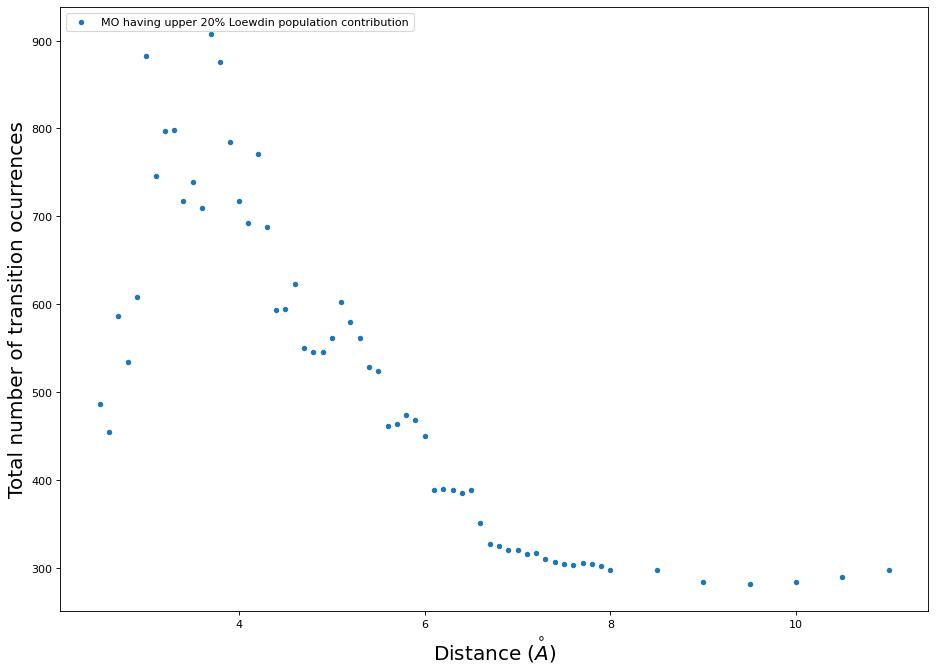

In [34]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n1 = fig.add_subplot(111)

#for ii in list_suf:
n1.scatter(AB_distances, (np.array(ts_pop_sum)+np.array(ts_pop_sum_2)), s=15, label='MO having upper 20% Loewdin population contribution')
#label='MO having upper 67% Loewdin population contribution'

plt.xlabel('Distance ($\overset{\circ}{A}$)')
plt.ylabel('Total number of transition ocurrences')
plt.legend(loc='upper left');
plt.show()

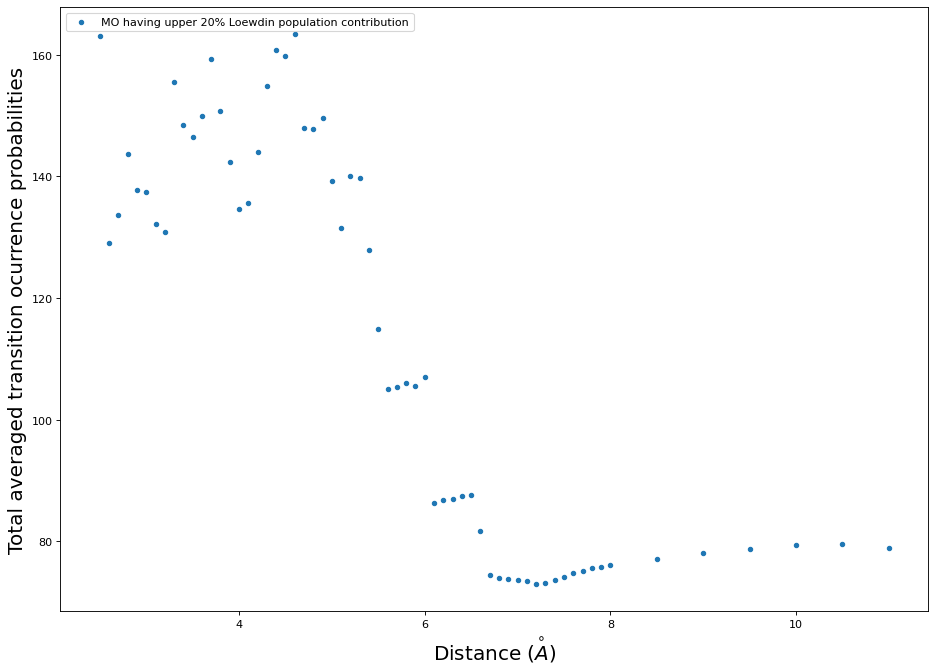

In [35]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n1 = fig.add_subplot(111)

#for ii in list_suf:
n1.scatter(AB_distances, (np.array(tspb_pop_sum)+np.array(tspb_pop_sum_2)), s=15, label='MO having upper 20% Loewdin population contribution')
#label='MO having upper 67% Loewdin population contribution'

plt.xlabel('Distance ($\overset{\circ}{A}$)')
plt.ylabel('Total averaged transition ocurrence probabilities')
plt.legend(loc='upper left');
plt.show()

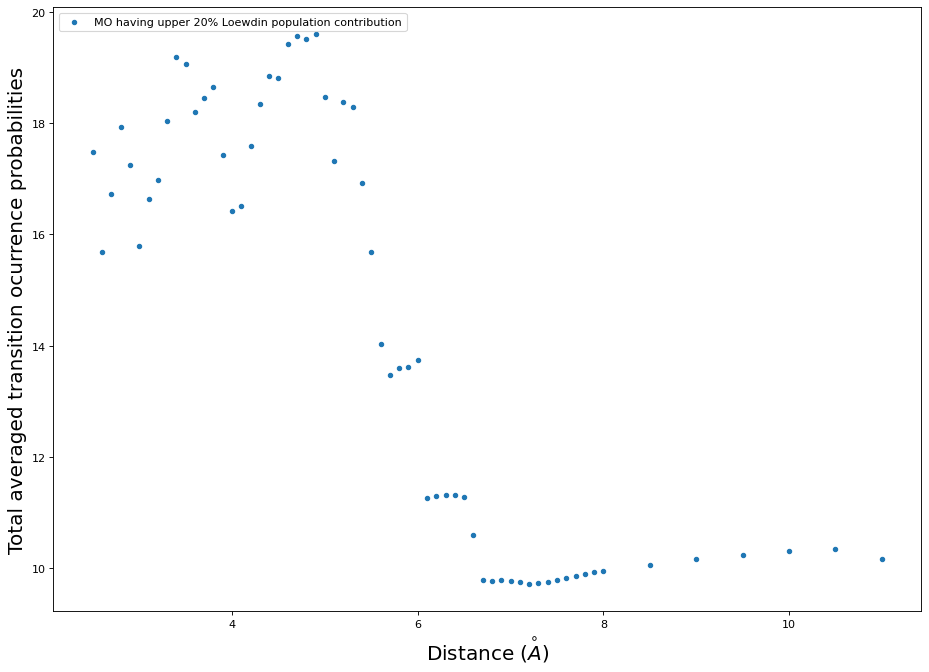

In [36]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n1 = fig.add_subplot(111)

#for ii in list_suf:
n1.scatter(AB_distances, np.array(tspb_list_fy)+np.array(tspb_list_yf), s=15, label='MO having upper 20% Loewdin population contribution')
#label='MO having upper 67% Loewdin population contribution'

plt.xlabel('Distance ($\overset{\circ}{A}$)')
plt.ylabel('Total averaged transition ocurrence probabilities')
plt.legend(loc='upper left');
plt.show()

#### by WSM

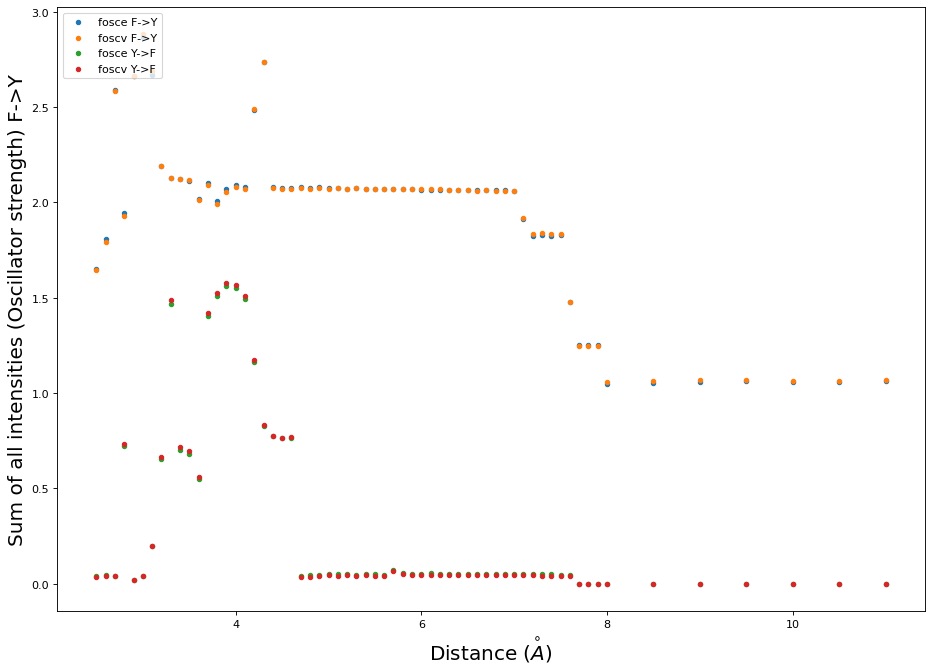

In [37]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n1 = fig.add_subplot(111)

#for ii in list_suf:
n1.scatter(AB_distances, fosce_all_sum, s=15, label='fosce F->Y')
n1.scatter(AB_distances, foscv_all_sum, s=15, label='foscv F->Y')
n1.scatter(AB_distances, fosce_all_sum_2, s=15, label='fosce Y->F')
n1.scatter(AB_distances, foscv_all_sum_2, s=15, label='foscv Y->F')

#label=str(ii/10)+'$\overset{\circ}{A}$'
plt.xlabel('Distance ($\overset{\circ}{A}$)')
plt.ylabel('Sum of all intensities (Oscillator strength) F->Y')
plt.legend(loc='upper left');
plt.show()

In [38]:
np.array(fosce_all_sum)+np.array(fosce_all_sum_2)

array([1.68960851, 1.84845576, 2.63016006, 2.66813957, 2.68049404,
       2.90689998, 2.86471715, 2.84299121, 3.59146526, 2.8227071 ,
       2.79673059, 2.56758085, 3.50834217, 3.51703188, 3.63226477,
       3.64048489, 3.57306996, 3.64362781, 3.56064304, 2.8529183 ,
       2.83859478, 2.8372845 , 2.12109739, 2.11664563, 2.12407063,
       2.12588595, 2.12483376, 2.12144103, 2.12230401, 2.12371272,
       2.11928747, 2.11906328, 2.14226292, 2.1243445 , 2.11755667,
       2.11587555, 2.11890102, 2.1158343 , 2.11491743, 2.113626  ,
       2.11338747, 2.11240257, 2.11412013, 2.11309239, 2.1127201 ,
       2.10924062, 1.95994261, 1.87387293, 1.87559676, 1.87382677,
       1.87210517, 1.5195256 , 1.25399725, 1.25357562, 1.25272236,
       1.04913993, 1.05394522, 1.06018163, 1.06035047, 1.0597052 ,
       1.0579938 , 1.06126061])

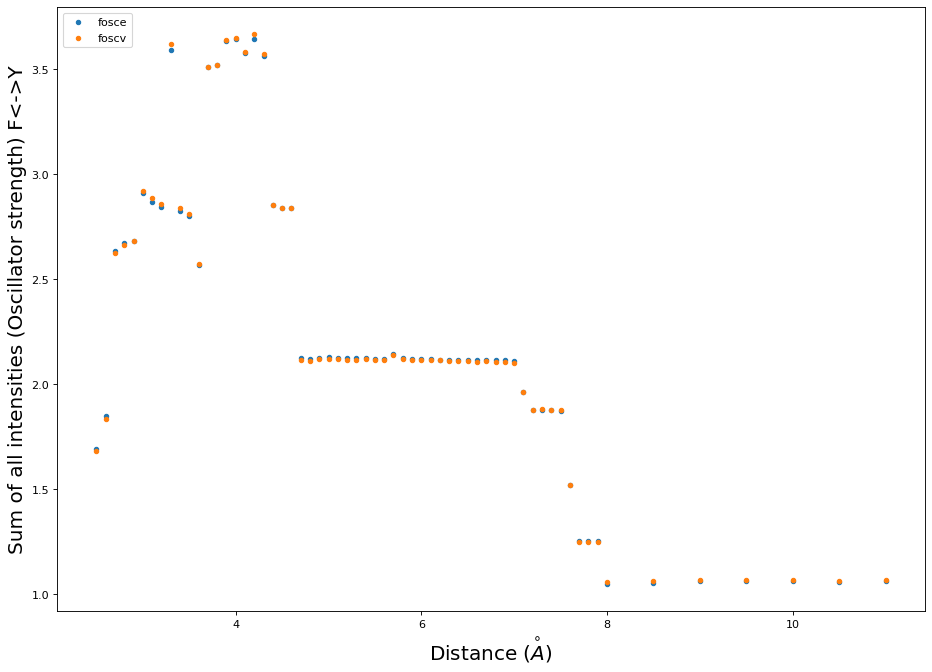

In [39]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n1 = fig.add_subplot(111)

#for ii in list_suf:
n1.scatter(AB_distances, (np.array(fosce_all_sum)+np.array(fosce_all_sum_2)), s=15, label='fosce')
n1.scatter(AB_distances, (np.array(foscv_all_sum)+np.array(foscv_all_sum_2)), s=15, label='foscv')

#label=str(ii/10)+'$\overset{\circ}{A}$'
plt.xlabel('Distance ($\overset{\circ}{A}$)')
plt.ylabel('Sum of all intensities (Oscillator strength) F<->Y')
plt.legend(loc='upper left');
plt.show()

#### by WAM

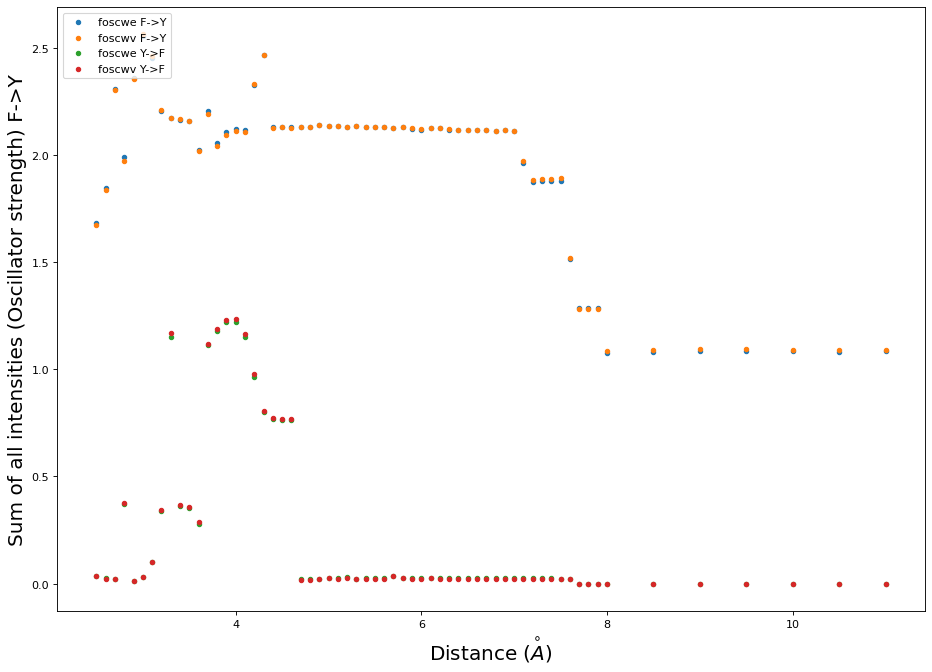

In [40]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n1 = fig.add_subplot(111)

#for ii in list_suf:
n1.scatter(AB_distances, foscwe_all_sum, s=15, label='foscwe F->Y')
n1.scatter(AB_distances, foscwv_all_sum, s=15, label='foscwv F->Y')
n1.scatter(AB_distances, foscwe_all_sum_2, s=15, label='foscwe Y->F')
n1.scatter(AB_distances, foscwv_all_sum_2, s=15, label='foscwv Y->F')

#label=str(ii/10)+'$\overset{\circ}{A}$'
plt.xlabel('Distance ($\overset{\circ}{A}$)')
plt.ylabel('Sum of all intensities (Oscillator strength) F->Y')
plt.legend(loc='upper left');
plt.show()

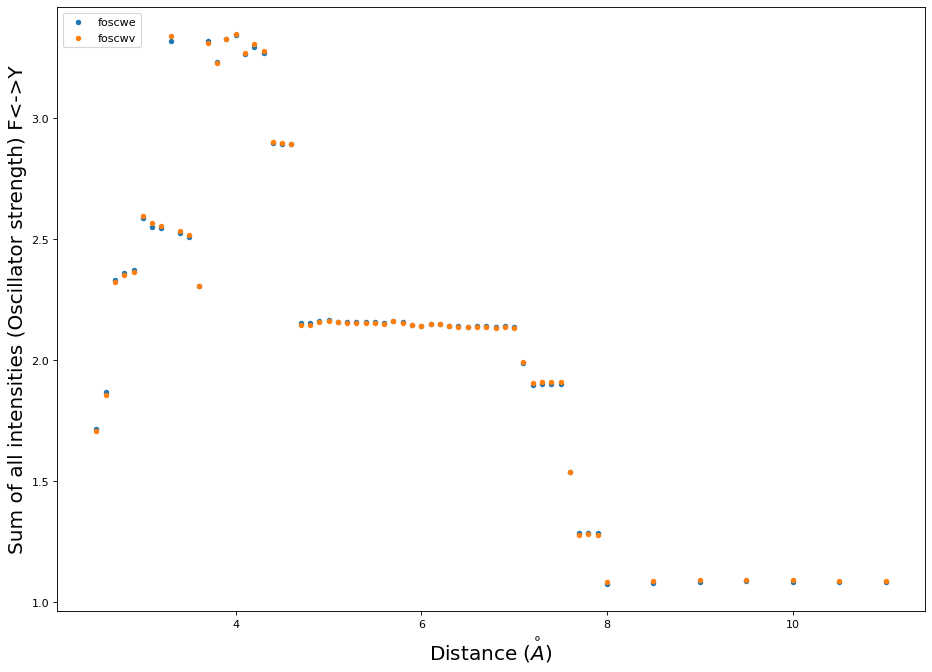

In [41]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n1 = fig.add_subplot(111)

#for ii in list_suf:
n1.scatter(AB_distances, (np.array(foscwe_all_sum)+np.array(foscwe_all_sum_2)), s=15, label='foscwe')
n1.scatter(AB_distances, (np.array(foscwv_all_sum)+np.array(foscwv_all_sum_2)), s=15, label='foscwv')

#label=str(ii/10)+'$\overset{\circ}{A}$'
plt.xlabel('Distance ($\overset{\circ}{A}$)')
plt.ylabel('Sum of all intensities (Oscillator strength) F<->Y')
plt.legend(loc='upper left');
plt.show()

_________________________

### varying loewdin population involved

In [42]:
loew_pop_list = [ii for ii in range(1,101,2)]
len(list_suf)

62

In [43]:
for pop in loew_pop_list:
    
    for ii in list_suf:
        globals()['resb_movirt_%s_FY_pop' % str(ii)] = \
        crop_by_loewdin_p(globals()['resb_movirt_%s_FY_raw' % str(ii)],pop/100)
        globals()['resb_movirt_%s_YF_pop' % str(ii)] = \
        crop_by_loewdin_p(globals()['resb_movirt_%s_YF_raw' % str(ii)],pop/100)
    ###
    for ii in list_suf:
        globals()['corevirtMO_matrix_tspb_%s_FY_pop' % str(ii)] = \
        cropping_matrix(globals()['corevirtMO_matrix_tspb_%s_FY_raw' % str(ii)], \
                        globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY_pop' % str(ii)])
        globals()['corevirtMO_matrix_tspb_%s_YF_pop' % str(ii)] = \
        cropping_matrix(globals()['corevirtMO_matrix_tspb_%s_FY_raw' % str(ii)], \
                        globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF_pop' % str(ii)])

    tspb_list_fy = []
    tspb_list_yf = []
    tspb_list_all = []
    
    for ii in list_suf:
        tspb_n_fy = 0
        tspb_n_yf = 0
        corevirt_tmp_fy = globals()['corevirtMO_matrix_tspb_%s_FY_pop' % str(ii)]
        corevirt_tmp_yf = globals()['corevirtMO_matrix_tspb_%s_YF_pop' % str(ii)]
        for jj in range(len(corevirt_tmp_fy)):
            tspb_n_fy += (corevirt_tmp_fy.iloc[jj]*corevirt_tmp_fy.iloc[jj]).sum()/corevirt_tmp_fy.iloc[jj].sum()
        for kk in range(len(corevirt_tmp_yf)):
            tspb_n_yf += (corevirt_tmp_yf.iloc[kk]*corevirt_tmp_yf.iloc[kk]).sum()/corevirt_tmp_yf.iloc[kk].sum()
        
        tspb_list_fy.append(tspb_n_fy)
        tspb_list_yf.append(tspb_n_yf)
        tspb_list_all.append(tspb_n_fy+tspb_n_yf)
        
    max_ts = max(tspb_list_all)
        
    globals()['loew_pop_%s' % str(pop)] =  pd.DataFrame({'Distance': [ii/10 for ii in list_suf],\
            'rel_tspb': [tspb_list_all[cc]/max_ts for cc in range(len(list_suf))], \
            'tspb_all': [tspb_list_all[cc] for cc in range(len(list_suf))],\
            'tspb_fy': [tspb_list_fy[cc] for cc in range(len(list_suf))],\
            'tspb_yf': [tspb_list_yf[cc] for cc in range(len(list_suf))]})
        

In [44]:
dff = pd.DataFrame()

for ii in list_suf:
    new_list = []
    for pop in loew_pop_list:
        aux = globals()['loew_pop_%s' % str(pop)]
        indx = aux[aux['Distance']==ii/10].index[0]
        new_list.append(aux.iloc[indx]['rel_tspb'])

    new_dff = pd.DataFrame({'rel_tspb': new_list})
    dff = pd.concat([dff,new_dff.T])
new_dff = pd.DataFrame({'loewd_pop': loew_pop_list})
dff = pd.concat([new_dff.T,dff])


In [45]:
#dff.iloc[0]

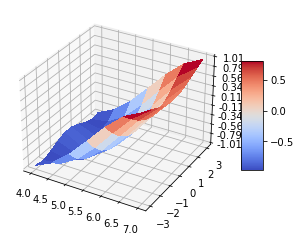

In [201]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
#X = np.arange(-5, 5, 0.25)
#Y = np.arange(-5, 5, 0.25)
xlist = np.linspace(4.0, 7.0, 7)
ylist = np.linspace(-3.0, 3.0, 10)
X, Y = np.meshgrid(xlist, ylist)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [203]:
xlist

array([4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ])

In [204]:
ylist

array([-3.        , -2.33333333, -1.66666667, -1.        , -0.33333333,
        0.33333333,  1.        ,  1.66666667,  2.33333333,  3.        ])

In [205]:
X 27.23

array([[4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ],
       [4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ],
       [4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ],
       [4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ],
       [4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ],
       [4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ],
       [4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ],
       [4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ],
       [4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ],
       [4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ]])

In [126]:
Y

array([[-3.        , -3.        , -3.        , -3.        , -3.        ,
        -3.        , -3.        ],
       [-2.33333333, -2.33333333, -2.33333333, -2.33333333, -2.33333333,
        -2.33333333, -2.33333333],
       [-1.66666667, -1.66666667, -1.66666667, -1.66666667, -1.66666667,
        -1.66666667, -1.66666667],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        ],
       [-0.33333333, -0.33333333, -0.33333333, -0.33333333, -0.33333333,
        -0.33333333, -0.33333333],
       [ 0.33333333,  0.33333333,  0.33333333,  0.33333333,  0.33333333,
         0.33333333,  0.33333333],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ],
       [ 1.66666667,  1.66666667,  1.66666667,  1.66666667,  1.66666667,
         1.66666667,  1.66666667],
       [ 2.33333333,  2.33333333,  2.33333333,  2.33333333,  2.33333333,
         2.33333333,  2.33333333],
       [ 3.        ,  3.    

In [206]:
Z

array([[-0.95892427, -0.76745273, -0.43697552, -0.01820226,  0.41233775,
         0.76800817,  0.97176225],
       [-0.99667466, -0.9370962 , -0.69292418, -0.30382276,  0.15393614,
         0.58341826,  0.88914003],
       [-0.9290145 , -0.99627522, -0.84827672, -0.51087766, -0.05597547,
         0.4142228 ,  0.79103099],
       [-0.83133918, -0.99473952, -0.92618484, -0.63885987, -0.19908366,
         0.2891013 ,  0.70886129],
       [-0.76579214, -0.98005462, -0.95571697, -0.6983528 , -0.27052005,
         0.22345346,  0.66294583],
       [-0.76579214, -0.98005462, -0.95571697, -0.6983528 , -0.27052005,
         0.22345346,  0.66294583],
       [-0.83133918, -0.99473952, -0.92618484, -0.63885987, -0.19908366,
         0.2891013 ,  0.70886129],
       [-0.9290145 , -0.99627522, -0.84827672, -0.51087766, -0.05597547,
         0.4142228 ,  0.79103099],
       [-0.99667466, -0.9370962 , -0.69292418, -0.30382276,  0.15393614,
         0.58341826,  0.88914003],
       [-0.95892427, -0.7674

In [83]:
len(global_name_n[:])

62

In [309]:
x_test = []
y_test = []
z_test = []

In [310]:
for ii in range(len(list_suf)):
    x_test.append(list(global_name_n[ii]['loewd_pop'].to_numpy()))
    #print(global_name_n[ii+1]['loewd_pop']) #for ii in range(len(list_suf))

In [311]:
for ii in range(len(list_suf)):
    y_test.append(list(global_name_n[ii]['rel_tspb'].to_numpy()))

In [312]:
for ii in range(len(list_suf)):
    z_test.append(list_suf[ii]/10)

In [225]:
np.array(list_suf)

array([ 25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  85,  90,  95, 100, 105, 110])

In [313]:
np.array(x_test)

array([[ 1.,  3.,  5., ..., 95., 97., 99.],
       [ 1.,  3.,  5., ..., 95., 97., 99.],
       [ 1.,  3.,  5., ..., 95., 97., 99.],
       ...,
       [ 1.,  3.,  5., ..., 95., 97., 99.],
       [ 1.,  3.,  5., ..., 95., 97., 99.],
       [ 1.,  3.,  5., ..., 95., 97., 99.]])

In [314]:
np.array(y_test)

array([[0.97643093, 0.97643093, 0.97643093, ..., 0.        , 0.        ,
        0.        ],
       [0.92061172, 0.92061172, 0.88144413, ..., 0.        , 0.        ,
        0.        ],
       [0.9305601 , 0.9305601 , 0.89350762, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.50217919, 0.50217919, 0.50217919, ..., 0.99695696, 0.99695696,
        1.        ],
       [0.50371201, 0.50371201, 0.50371201, ..., 1.        , 1.        ,
        0.55607729],
       [0.49532924, 0.49532924, 0.49532924, ..., 0.98335802, 0.98335802,
        0.98170798]])

In [315]:
np.array(z_test)

array([ 2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,
        3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,
        4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,  5.6,  5.7,
        5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,  6.7,  6.8,
        6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,  7.8,  7.9,
        8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ])

In [249]:
z_test = np.linspace(0, 15, 1000)

In [235]:
type(x_test)

list

In [308]:
z_test/10

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [292]:
X, Y = np.meshgrid(x_test[0], z_test)

In [294]:
print(X.shape)

(62, 50)


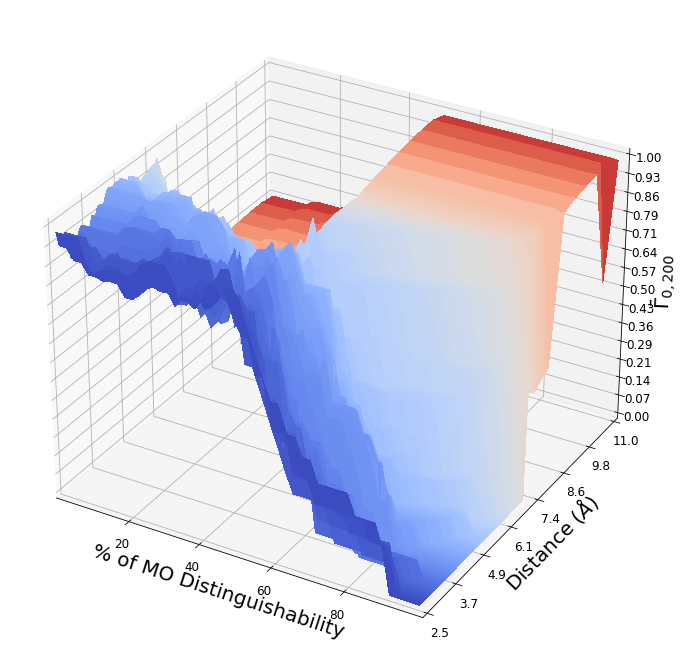

In [411]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(16, 12))

# Make data.
#X = np.arange(-5, 5, 0.25)
#Y = np.arange(-5, 5, 0.25)
#X, Y = np.meshgrid(xlist, ylist)
#Z = np.sin(R)
pop_mesh, dist_mesh = np.meshgrid(x_test[0], z_test)

intens_mesh = np.array(y_test)

c_dim = dist_mesh
minn, maxx = c_dim.min(), c_dim.max()
norm = matplotlib.colors.Normalize(minn, maxx)
m = plt.cm.ScalarMappable(norm=norm, cmap='coolwarm')
m.set_array([])
fcolors = m.to_rgba(c_dim)
# Plot the surface.
#surf = ax.plot_surface(pop_mesh, dist_mesh, intens_mesh, cmap=cm.coolwarm,
#                       linewidth=0, antialiased=False)

surf = ax.plot_surface(pop_mesh, dist_mesh, intens_mesh, rstride=1, cstride=1,
                       facecolors=fcolors, vmin=minn, vmax=maxx, shade=False,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0, 1)
ax.zaxis.set_major_locator(LinearLocator(15))
ax.yaxis.set_major_locator(LinearLocator(8))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
ax.yaxis.set_major_formatter('{x:.01f}')

ax.axes.set_xlim3d(left=1, right=99) 
ax.axes.set_ylim3d(bottom=2.5, top=11)
ax.axes.set_zlim3d(bottom=0, top=1)

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel(r'% of MO Distinguishability', fontsize=20)
ax.set_ylabel(r'Distance $(\AA)$', fontsize=20)
ax.set_zlabel(r'$\bar{\Gamma}_{0,200}$', fontsize=20)
fig.savefig('surf_pop_dist_transp.svg', format="svg")
plt.show()

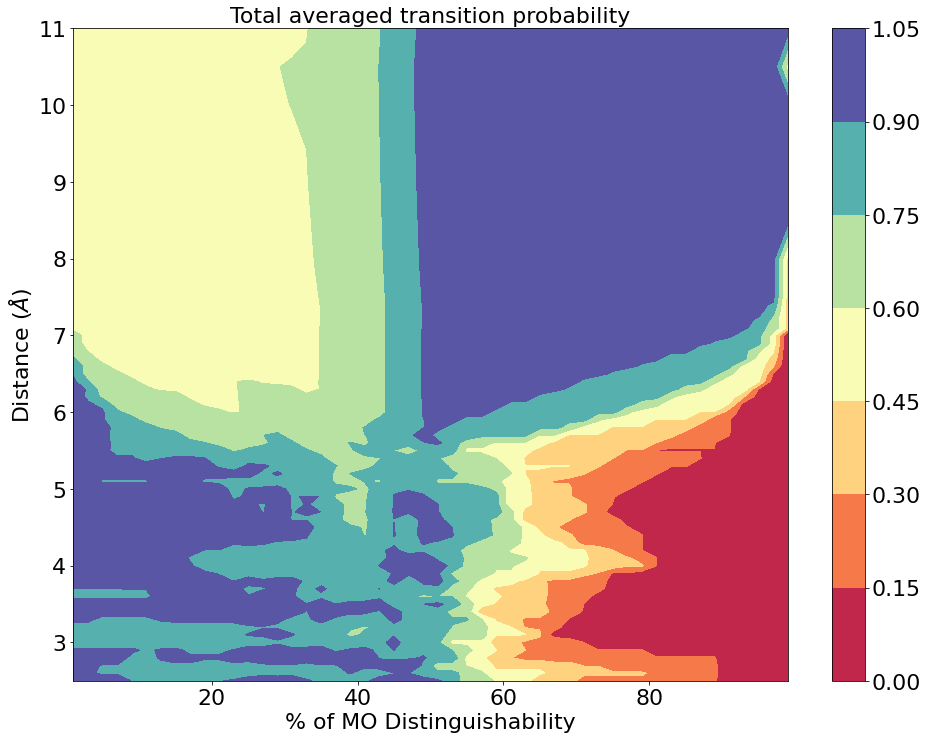

In [413]:
#fig = plt.subplots(figsize=(16, 12), dpi=80)
plt.rcParams.update({'font.size': 22})
fig,ax=plt.subplots(figsize=(16, 12))

c_dim = intens_mesh
minn, maxx = c_dim.min(), c_dim.max()
norm = matplotlib.colors.Normalize(minn, maxx)
m = plt.cm.ScalarMappable(norm=norm, cmap='Spectral')
m.set_array([])
fcolors = m.to_rgba(c_dim)

#cp = ax.contourf(pop_mesh, dist_mesh, intens_mesh,
#                 vmin=minn, vmax=maxx, antialiased=False)
cp = ax.contourf(pop_mesh, dist_mesh, intens_mesh,
                  vmin=0.01, vmax=0.99, cmap=cm.Spectral)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Total averaged transition probability', fontsize=22)
#ax.set_title(r'$\bar{\Gamma}_{0,200}$')
#ax.set_xlabel(r'$L\"owdin$ population')
ax.set_xlabel(r'% of MO Distinguishability', fontsize=22)
ax.set_ylabel(r'Distance $(\AA)$', fontsize=22)
fig.savefig('contour_pop_dist_transp.svg', format="svg")
plt.show()

In [364]:
minn

0.0

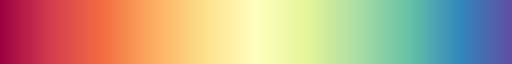

In [362]:
cm.Spectral

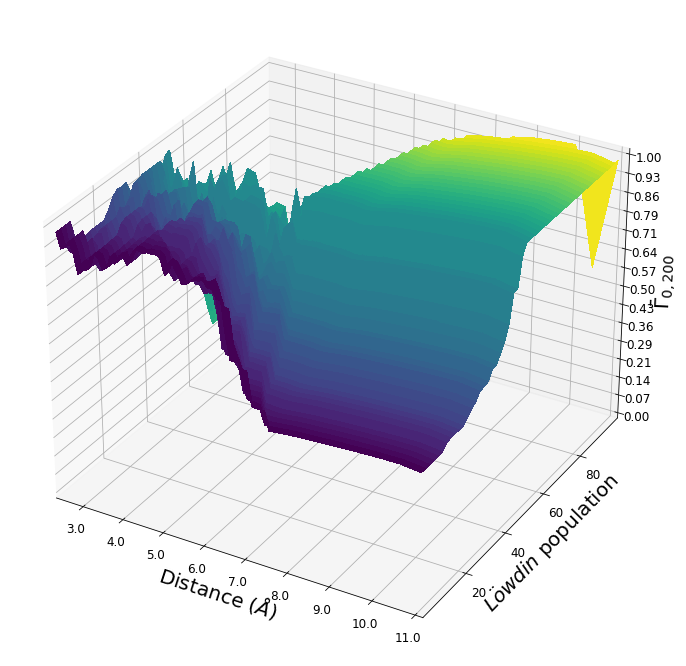

In [410]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(16, 12))

# Make data.
#X = np.arange(-5, 5, 0.25)
#Y = np.arange(-5, 5, 0.25)
#X, Y = np.meshgrid(xlist, ylist)
#Z = np.sin(R)
pop_mesh, dist_mesh = np.meshgrid(x_test[0], z_test)

intens_mesh = np.array(y_test)

c_dim = pop_mesh
minn, maxx = c_dim.min(), c_dim.max()
norm = matplotlib.colors.Normalize(minn, maxx)
m = plt.cm.ScalarMappable(norm=norm, cmap='viridis')
m.set_array([])
fcolors = m.to_rgba(c_dim)
# Plot the surface.
#surf = ax.plot_surface(pop_mesh, dist_mesh, intens_mesh, cmap=cm.coolwarm,
#                       linewidth=0, antialiased=False)

surf = ax.plot_surface(dist_mesh, pop_mesh, intens_mesh, rstride=1, cstride=1,
                       facecolors=fcolors, vmin=minn, vmax=maxx, shade=False,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0, 1)
ax.zaxis.set_major_locator(LinearLocator(15))
#ax.xaxis.set_major_locator(LinearLocator(8))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
ax.xaxis.set_major_formatter('{x:.01f}')

ax.axes.set_xlim3d(left=2.5, right=11) 
ax.axes.set_ylim3d(bottom=1, top=99)
ax.axes.set_zlim3d(bottom=0, top=1)

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel(r'Distance $(\AA)$', fontsize=20)
ax.set_ylabel(r'$L\"owdin$ population', fontsize=20)
ax.set_zlabel(r'$\bar{\Gamma}_{0,200}$', fontsize=20)
#ax.set_zlabel('Averaged transition probability')
fig.savefig('surf_dist_pop_transp.svg', format="svg")
plt.show()

In [101]:
global_name_test = [pd.DataFrame({'rel_tspb': dff.iloc[ii+1].tolist(), 'loewd_pop': dff.iloc[0].tolist()}) \
                 for ii in range(len(list_suf))]

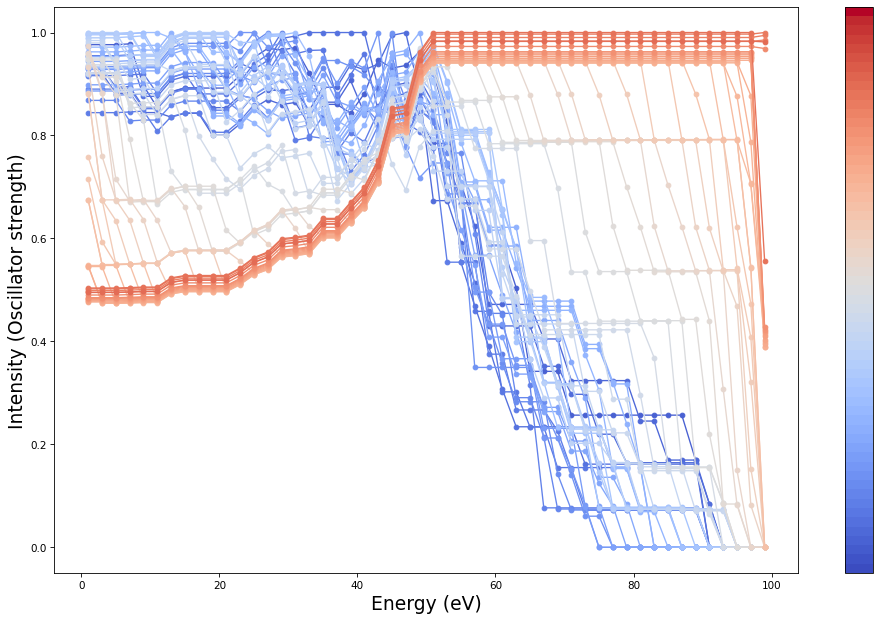

In [46]:
global_name_n = [pd.DataFrame({'rel_tspb': dff.iloc[ii+1].tolist(), 'loewd_pop': dff.iloc[0].tolist()}) \
                 for ii in range(len(list_suf))]
label_name = [str(ii/10)+'A' for ii in list_suf] 
plot_alot_xray(global_name_n, list_suf, 'loewd_pop', 'rel_tspb', dpi=75, markersize=4.5,
              plotsvg=True, nameplt='trans_probvs.loewpop_distance.svg')#,\
        # xlmt=True, xmin=288.5, xmax=350, plotsvg=True, nameplt='total_xspectra1.svg')

In [57]:
list_suf, global_name_n

([25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  85,
  90,
  95,
  100,
  105,
  110],
 [    rel_tspb  loewd_pop
  0   0.976431        1.0
  1   0.976431        3.0
  2   0.976431        5.0
  3   0.977975        7.0
  4   0.896825        9.0
  5   0.854236       11.0
  6   0.884357       13.0
  7   0.892131       15.0
  8   0.892131       17.0
  9   0.892131       19.0
  10  0.892131       21.0
  11  0.916858       23.0
  12  0.951253       25.0
  13  0.969206       27.0
  14  0.966100       29.0
  15  0.970720       31.0
  16  0.922056       33.0
  17  0.860442       35.0
  18  0.860442       37.0
  19  0.843694       39.0
  20  0.881282       41.0
  21  0.947362       43.0
  22  0.930787       45.0


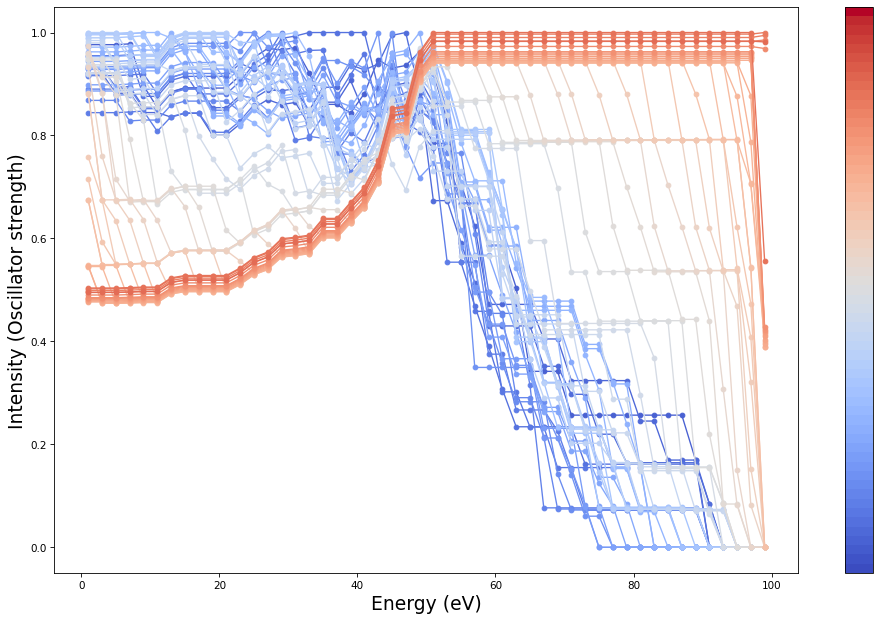

In [47]:
global_name_n = [pd.DataFrame({'rel_tspb': dff.iloc[ii+1].tolist(), 'loewd_pop': dff.iloc[0].tolist()}) \
                 for ii in range(len(list_suf))]
label_name = [str(ii/10)+'A' for ii in list_suf] 
plot_alot_xray(global_name_n, list_suf, 'loewd_pop', 'rel_tspb', dpi=75, markersize=4.5)#,
            #  plotsvg=True, nameplt='loewdin_probtrans.svg')#,\

In [48]:
list_suf[30:41]

[55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]

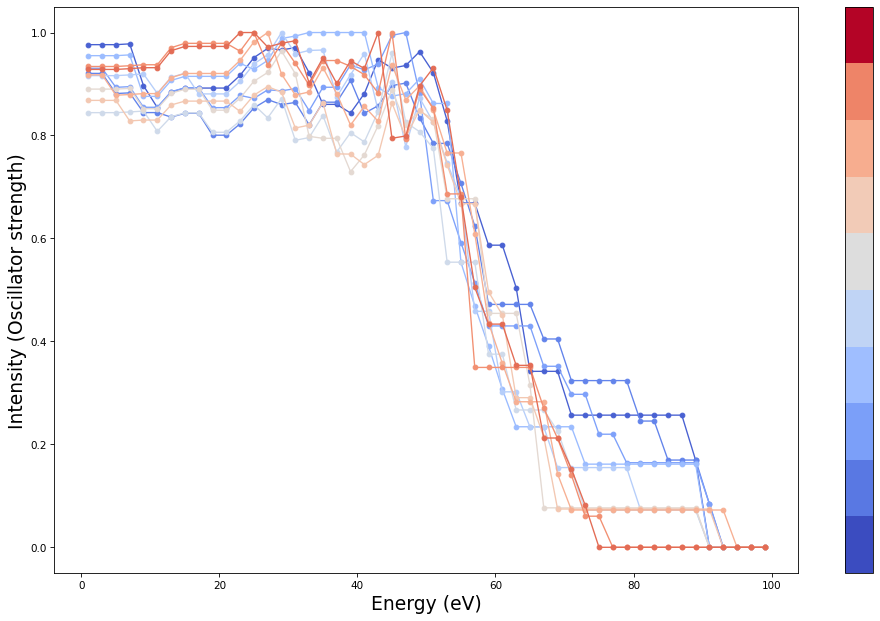

In [49]:
global_name_new = [pd.DataFrame({'rel_tspb': dff.iloc[ii+1].tolist(), 'loewd_pop': dff.iloc[0].tolist()}) \
                 for ii in range(len(list_suf[30:41]))]
label_name_new = [str(ii/10)+'A' for ii in list_suf[30:41]] 
plot_alot_xray(global_name_new, list_suf[30:41], 'loewd_pop', 'rel_tspb', dpi=75, markersize=4.5)

In [50]:
dff#.iloc[:,[0,1]]
new_distf = pd.DataFrame({'Distance': np.array(list_suf)/10})
dff_dist = pd.concat([new_distf, dff.T.iloc[:,1:len(list_suf)+1].T.reset_index().iloc[:,1:len(list_suf)+1]], \
                     axis=1)


In [51]:
dff_dist.iloc[:,[0,45]][44]

0     0.169250
1     0.169481
2     0.164321
3     0.161541
4     0.073656
        ...   
57    0.982721
58    0.990358
59    0.996957
60    1.000000
61    0.983358
Name: 44, Length: 62, dtype: float64

In [52]:
aux_df=dff_dist
aux_df.rename(columns={0 : "test_0"})

,Distance,test_0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,2.5,0.976431,0.976431,0.976431,0.977975,0.896825,0.854236,0.884357,0.892131,0.892131,...,0.256733,0.256733,0.256733,0.256733,0.169250,0.000000,0.000000,0.000000,0.000000,0.000000
1,2.6,0.920612,0.920612,0.881444,0.882838,0.844491,0.844491,0.835729,0.843076,0.843076,...,0.245260,0.245260,0.169481,0.169481,0.169481,0.083981,0.000000,0.000000,0.000000,0.000000
2,2.7,0.930560,0.930560,0.893508,0.894921,0.854803,0.854803,0.884944,0.892723,0.892723,...,0.164321,0.164321,0.164321,0.164321,0.164321,0.084276,0.000000,0.000000,0.000000,0.000000
3,2.8,0.955055,0.955055,0.955055,0.956566,0.876006,0.876006,0.906894,0.914866,0.914866,...,0.161541,0.161541,0.161541,0.161541,0.161541,0.000000,0.000000,0.000000,0.000000,0.000000
4,2.9,0.916254,0.916254,0.916254,0.917703,0.919574,0.881843,0.912937,0.920962,0.880760,...,0.073656,0.073656,0.073656,0.073656,0.073656,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,9.0,0.495009,0.495009,0.495009,0.495791,0.496802,0.496802,0.514320,0.518841,0.518841,...,0.982721,0.982721,0.982721,0.982721,0.982721,0.982721,0.982721,0.982721,0.982721,0.985495
58,9.5,0.498855,0.498855,0.498855,0.499644,0.500663,0.500663,0.518316,0.522873,0.522873,...,0.990358,0.990358,0.990358,0.990358,0.990358,0.990358,0.990358,0.990358,0.990358,0.994466
59,10.0,0.502179,0.502179,0.502179,0.502973,0.503999,0.503999,0.521770,0.526357,0.526357,...,0.996957,0.996957,0.996957,0.996957,0.996957,0.996957,0.996957,0.996957,0.996957,1.000000
60,10.5,0.503712,0.503712,0.503712,0.504509,0.505537,0.505537,0.523363,0.527963,0.527963,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.556077


In [53]:
#fig = plt.figure(figsize=(14, 10), dpi=80)
#n1 = fig.add_subplot(111)
#n1.plot('Distance', 44, dff_dist.iloc[:,[0,45]])

In [54]:
#len(colors)

NameError: name 'colors' is not defined

No handles with labels found to put in legend.


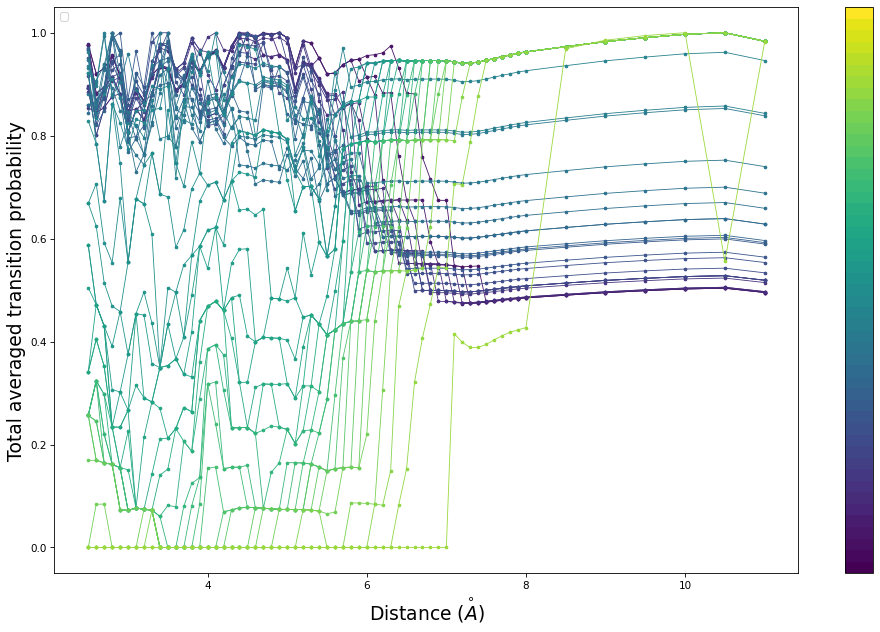

In [330]:
figsize=(16, 10)
dpi=75
linestyle='-'
marker='o'
linewidth=0.8
markersize=2.5
fig = plt.figure(figsize=figsize, dpi=dpi)
n1 = fig.add_subplot(111)

colors=matplotlib.pyplot.get_cmap(name='viridis')(np.linspace(0.05, 0.85, len(loew_pop_list)))

for ii in range(len(loew_pop_list)): 
    n1.plot('Distance', "0", data=dff_dist.iloc[:,[0,ii+1]].rename(columns={ii : "0"}), \
                    linestyle=linestyle, marker=marker, linewidth=linewidth, \
                    markersize=markersize, color=colors[ii], label='_nolegend_')

#n1.scatter(AB_distances, np.array(tspb_list_fy)+np.array(tspb_list_yf), s=15, label='MO having upper 20% Loewdin population contribution')
#label='MO having upper 67% Loewdin population contribution'

cmap = plt.get_cmap("viridis", len(loew_pop_list))
norm= matplotlib.colors.BoundaryNorm(np.linspace(0.05, 0.85, len(loew_pop_list)),len(loew_pop_list))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ticks=np.arange(0,len(loew_pop_list)))

plt.xlabel('Distance ($\overset{\circ}{A}$)')
plt.ylabel('Total averaged transition probability')
plt.legend(loc='upper left');
fig.savefig('trans_probvs.distance_loewpop.svg', format="svg")
plt.show()

In [ ]:
colors[49]

In [ ]:
loew_pop_list[49]

### Using lowdin population >45

In [ ]:
chosen_pop=65

In [ ]:
for ii in list_suf:
    globals()['resb_movirt_%s_FY_pop' % str(ii)] = \
    crop_by_loewdin_p(globals()['resb_movirt_%s_FY_raw' % str(ii)],chosen_pop/100)
    globals()['resb_movirt_%s_YF_pop' % str(ii)] = \
    crop_by_loewdin_p(globals()['resb_movirt_%s_YF_raw' % str(ii)],chosen_pop/100)
    ###
for ii in list_suf:
    globals()['corevirtMO_matrix_tspb_%s_FY_pop' % str(ii)] = \
    cropping_matrix(globals()['corevirtMO_matrix_tspb_%s_FY_raw' % str(ii)], \
                    globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY_pop' % str(ii)])
    globals()['corevirtMO_matrix_tspb_%s_YF_pop' % str(ii)] = \
    cropping_matrix(globals()['corevirtMO_matrix_tspb_%s_FY_raw' % str(ii)], \
                    globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF_pop' % str(ii)])

tspb_list_fy = []
tspb_list_yf = []
tspb_list_all = []
    
for ii in list_suf:
    tspb_n_fy = 0
    tspb_n_yf = 0
    corevirt_tmp_fy = globals()['corevirtMO_matrix_tspb_%s_FY_pop' % str(ii)]
    corevirt_tmp_yf = globals()['corevirtMO_matrix_tspb_%s_YF_pop' % str(ii)]
    for jj in range(len(corevirt_tmp_fy)):
        tspb_n_fy += (corevirt_tmp_fy.iloc[jj]*corevirt_tmp_fy.iloc[jj]).sum()/corevirt_tmp_fy.iloc[jj].sum()
    for kk in range(len(corevirt_tmp_yf)):
        tspb_n_yf += (corevirt_tmp_yf.iloc[kk]*corevirt_tmp_yf.iloc[kk]).sum()/corevirt_tmp_yf.iloc[kk].sum()
        
    tspb_list_fy.append(tspb_n_fy)
    tspb_list_yf.append(tspb_n_yf)
    tspb_list_all.append(tspb_n_fy+tspb_n_yf)
        
max_ts = max(tspb_list_all)
        
globals()['loew_pop_%s' % str(chosen_pop)] =  pd.DataFrame({'Distance': [ii/10 for ii in list_suf],\
            'rel_tspb': [tspb_list_all[cc]/max_ts for cc in range(len(list_suf))], \
            'tspb_all': [tspb_list_all[cc] for cc in range(len(list_suf))],\
            'tspb_fy': [tspb_list_fy[cc] for cc in range(len(list_suf))],\
            'tspb_yf': [tspb_list_yf[cc] for cc in range(len(list_suf))]})
        

In [ ]:
loew_pop_1

In [ ]:
lowed_optimal=[1,45,46,47,48,49,50,61,63,69,73,79,81,99]

In [ ]:
figsize=(16, 10)
dpi=75
linestyle='-'
marker='o'
linewidth=0.8
markersize=2.5
fig = plt.figure(figsize=figsize, dpi=dpi)
n1 = fig.add_subplot(111)

colors=matplotlib.pyplot.get_cmap(name='viridis')(np.linspace(0.05, 0.85, len(lowed_optimal)))

for ii in range(len(lowed_optimal)):
    n1.plot('Distance', 'rel_tspb', data=globals()['loew_pop_%s' % str(lowed_optimal[ii])], \
                    linestyle=linestyle, marker=marker, linewidth=linewidth, \
                    markersize=markersize, color=colors[ii], label='_nolegend_')

#n1.scatter(AB_distances, np.array(tspb_list_fy)+np.array(tspb_list_yf), s=15, label='MO having upper 20% Loewdin population contribution')
#label='MO having upper 67% Loewdin population contribution'

cmap = plt.get_cmap("viridis", len(lowed_optimal)+1)
norm= matplotlib.colors.BoundaryNorm(np.linspace(0.05, 0.85, len(lowed_optimal)+1),len(lowed_optimal)+1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ticks=np.arange(1,len(lowed_optimal)+1))

plt.xlabel('Distance ($\overset{\circ}{A}$)')
plt.ylabel('Total averaged transition probability')
plt.legend(loc='upper left');
fig.savefig('trans_probvs.distance_loewpop_selected.svg', format="svg")
plt.show()

In [ ]:
lowed_detached=[1,61,63,69,73,79,81,99]#

In [ ]:
figsize=(16, 10)
dpi=75
linestyle='-'
marker='o'
linewidth=0.8
markersize=2.5
fig = plt.figure(figsize=figsize, dpi=dpi)
n1 = fig.add_subplot(111)

colors=matplotlib.pyplot.get_cmap(name='viridis')(np.linspace(0.05, 0.85, len(lowed_detached)))

for ii in range(len(lowed_detached)):
    n1.plot('Distance', 'rel_tspb', data=globals()['loew_pop_%s' % str(lowed_detached[ii])], \
                    linestyle=linestyle, marker=marker, linewidth=linewidth, \
                    markersize=markersize, color=colors[ii], label='_nolegend_')

#n1.scatter(AB_distances, np.array(tspb_list_fy)+np.array(tspb_list_yf), s=15, label='MO having upper 20% Loewdin population contribution')
#label='MO having upper 67% Loewdin population contribution'

cmap = plt.get_cmap("viridis", len(lowed_detached)+1)
norm= matplotlib.colors.BoundaryNorm(np.linspace(0.05, 0.85, len(lowed_detached)+1),len(lowed_detached)+1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ticks=np.arange(1,len(lowed_detached)+1))

plt.xlabel('Distance ($\overset{\circ}{A}$)')
plt.ylabel('Total averaged transition probability')
plt.legend(loc='upper left');
#fig.savefig('trans_probvs.distance_loewpop.svg', format="svg")
plt.show()

In [ ]:
loew_pop_57.iloc[12:28]['rel_tspb'].max()
#loew_pop_57.iloc[12:28]

In [ ]:
#lowed_rate_detaching = [1]
lowed_rate_detaching = []
l_tmp = [i for i in range(51,85,2)]
for i in l_tmp:
    lowed_rate_detaching.append(i)
#lowed_rate_detaching.append(99)
lowed_rate_detaching

In [ ]:
max_detach = [globals()['loew_pop_%s' % str(ii)].iloc[12:28]['rel_tspb'].max() for ii in lowed_rate_detaching]
max_detach

In [ ]:
detach_rate = pd.DataFrame({'trans_prob': max_detach, 'loewdin_p': lowed_rate_detaching})

In [ ]:
figsize=(16, 10)
dpi=75
linestyle='-'
marker='o'
linewidth=0.8
markersize=3.5
fig = plt.figure(figsize=figsize, dpi=dpi)
n1 = fig.add_subplot(111)

#colors=matplotlib.pyplot.get_cmap(name='viridis')(np.linspace(0.05, 0.85, len(lowed_detached)))

#for ii in range(len(lowed_detached)):
#n1.plot('trans_prob', 'loewdin_p', data=detach_rate, \
#                    linestyle=linestyle, marker=marker, linewidth=linewidth, \
#                    markersize=markersize, label='loewdin population change rate')
m, b = np.polyfit(detach_rate['trans_prob'], detach_rate['loewdin_p'], 1)
n1.plot(detach_rate['trans_prob'], m*detach_rate['trans_prob']+b)
n1.scatter(detach_rate['trans_prob'], \
           detach_rate['loewdin_p'], s=12, label='loewdin population change rate')
plt.xlabel('Relative transition probability')
plt.ylabel('Loewdin population >')
plt.legend(loc='upper left');
fig.savefig('rate_loewpop_trans_prob_.svg', format="svg")
plt.show()

In [ ]:
n2.scatter(globals()['fy_%s' % str(ii)][['Energy']], \
           globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')

In [ ]:
global_name = [globals()['fy_%s' % str(ii)] for ii in list_suf] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf] 
plot_alot_xray(global_name, list_suf, 'Energy', 'Intensity', dpi=75,\
         xlmt=True, xmin=288.7, xmax=296.5, plotsvg=True, nameplt='total_predge_region1.svg')

In [ ]:
new_evsi = pd.DataFrame({'Energy': [global_name_cut_1[cc+1]['Energy'] - global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf)-1)], \
 'Intensity': [global_name_cut_1[cc+1]['Intensity'] - global_name_cut_1[cc]['Intensity'] for cc in range(len(list_suf)-1)]})
neww_evsi = [new_evsi.iloc[ii] for ii in range(len(list_suf)-1)]

##### dx,dy and dz correspond to the x-, y- and z-components of the transition moment (d)

### G$_{2}$YG$_{n}$FG$_ {11-n}$ ( $n=0..9$ )
#### optimized at PM7 and DFTB3-D3H4
#### by similarity

In [ ]:
#Uncomment the original range to see more peaks outside the expected range
resa_chphe="resA_MOcore_chainFY_"
resa_chtyr="resA_MOcore_chainYF_"
post=".csv"
list_suf_c = [10, 30, 50, 70, 90]

for ii in list_suf:
    globals()['resa_mocore_%s_chFY_raw' % str(ii)] = pd.read_csv(resa_chphe+str(ii)+post, delimiter=',', index_col='num-1')
    globals()['resa_mocore_%s_chYF_raw' % str(ii)] = pd.read_csv(resa_chtyr+str(ii)+post, delimiter=',', index_col='num-1')

resa_mocore_10_chFY_raw#.head()
#resa_mocore_27_YF_raw

In [ ]:
#Uncomment the original range to see more peaks outside the expected range
file=""
post="_opt_gms.csv"
g2ypg11 = pd.read_csv(file+'G2YPG11'+post, delimiter=',')
g2ygpg10 = pd.read_csv(file+'G2YGPG10'+post, delimiter=',')
g2yg2pg9 = pd.read_csv(file+'G2YG2PG9'+post, delimiter=',')
g2yg3pg8 = pd.read_csv(file+'G2YG3PG8'+post, delimiter=',')
g2yg4pg7 = pd.read_csv(file+'G2YG4PG7'+post, delimiter=',')
g2yg5pg6 = pd.read_csv(file+'G2YG5PG6'+post, delimiter=',')
g2yg6pg5 = pd.read_csv(file+'G2YG6PG5'+post, delimiter=',')
g2yg7pg4 = pd.read_csv(file+'G2YG7PG4'+post, delimiter=',')
g2yg8pg3 = pd.read_csv(file+'G2YG8PG3'+post, delimiter=',')
g2yg9pg2 = pd.read_csv(file+'G2YG9PG2'+post, delimiter=',')
g2yg12 = pd.read_csv(file+'G2YG12'+post, delimiter=',')
g4pg10 = pd.read_csv(file+'G4PG10'+post, delimiter=',')

g2ypg11.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2ygpg10.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2yg2pg9.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2yg3pg8.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2yg4pg7.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2yg5pg6.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2yg6pg5.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2yg7pg4.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2yg8pg3.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2yg9pg2.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2yg12.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g4pg10.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']

g2yg9pg2

In [ ]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n2 = fig.add_subplot(111)
#n2.scatter(g2ypg11[['Energy']],g2ypg11[['Intensity']], s=5, label='G2YPG11')
#n2.scatter(g2ygpg10[['Energy']],g2ygpg10[['Intensity']], s=5, label='G2YGPG10')
#n2.scatter(g2yg2pg9[['Energy']],g2yg2pg9[['Intensity']], s=5, label='G2YG2PG9')
#n2.scatter(g2yg3pg8[['Energy']],g2yg3pg8[['Intensity']], s=5, label='G2YG3PG8')
#n2.scatter(g2yg4pg7[['Energy']],g2yg4pg7[['Intensity']], s=5, label='G2YG4PG7')
#n2.scatter(g2yg5pg6[['Energy']],g2yg5pg6[['Intensity']], s=5, label='G2YG5PG6')
n2.scatter(g2yg6pg5[['Energy']],g2yg6pg5[['Intensity']], s=5, label='G2YG6PG5')
n2.scatter(g2yg7pg4[['Energy']],g2yg7pg4[['Intensity']], s=5, label='G2YG7PG4')
n2.scatter(g2yg8pg3[['Energy']],g2yg8pg3[['Intensity']], s=5, label='G2YG8PG3')
n2.scatter(g2yg9pg2[['Energy']],g2yg9pg2[['Intensity']], s=5, label='G2YG9PG2')
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.show()

In [ ]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n2 = fig.add_subplot(111)
n2.scatter(g2ypg11[['Energy']],g2ypg11[['Intensity']], s=5, label='G2YPG11')
n2.scatter(g2ygpg10[['Energy']],g2ygpg10[['Intensity']], s=5, label='G2YGPG10')
n2.scatter(g2yg2pg9[['Energy']],g2yg2pg9[['Intensity']], s=5, label='G2YG2PG9')
n2.scatter(g2yg3pg8[['Energy']],g2yg3pg8[['Intensity']], s=5, label='G2YG3PG8')
n2.scatter(g2yg4pg7[['Energy']],g2yg4pg7[['Intensity']], s=5, label='G2YG4PG7')
#n2.scatter(g2yg5pg6[['Energy']],g2yg5pg6[['Intensity']], s=5, label='G2YG5PG6')
#n2.scatter(g2yg6pg5[['Energy']],g2yg6pg5[['Intensity']], s=5, label='G2YG6PG5')
#n2.scatter(g2yg7pg4[['Energy']],g2yg7pg4[['Intensity']], s=5, label='G2YG7PG4')
#n2.scatter(g2yg8pg3[['Energy']],g2yg8pg3[['Intensity']], s=5, label='G2YG8PG3')
#n2.scatter(g2yg9pg2[['Energy']],g2yg9pg2[['Intensity']], s=5, label='G2YG9PG2')
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.show()

In [ ]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n2 = fig.add_subplot(111)
#n2.scatter(g2ypg11[['Energy']],g2ypg11[['Intensity']], s=5, label='G2YPG11')
#n2.scatter(g2ygpg10[['Energy']],g2ygpg10[['Intensity']], s=5, label='G2YGPG10')
#n2.scatter(g2yg2pg9[['Energy']],g2yg2pg9[['Intensity']], s=5, label='G2YG2PG9')
#n2.scatter(g2yg3pg8[['Energy']],g2yg3pg8[['Intensity']], s=5, label='G2YG3PG8')
n2.scatter(g2yg4pg7[['Energy']],g2yg4pg7[['Intensity']], s=5, label='G2YG4PG7')
n2.scatter(g2yg5pg6[['Energy']],g2yg5pg6[['Intensity']], s=5, label='G2YG5PG6')
n2.scatter(g2yg6pg5[['Energy']],g2yg6pg5[['Intensity']], s=5, label='G2YG6PG5')
#n2.scatter(g2yg7pg4[['Energy']],g2yg7pg4[['Intensity']], s=5, label='G2YG7PG4')
#n2.scatter(g2yg8pg3[['Energy']],g2yg8pg3[['Intensity']], s=5, label='G2YG8PG3')
#n2.scatter(g2yg9pg2[['Energy']],g2yg9pg2[['Intensity']], s=5, label='G2YG9PG2')
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.show()

In [ ]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n2 = fig.add_subplot(111)
#n2.scatter(g2ypg11[['Energy']],g2ypg11[['Intensity']], s=5, label='G2YPG11')
#n2.scatter(g2ygpg10[['Energy']]-0.05,g2ygpg10[['Intensity']], s=5, label='G2YGPG10')
#n2.scatter(g2yg2pg9[['Energy']]-0.13,g2yg2pg9[['Intensity']], s=5, label='G2YG2PG9')
#n2.scatter(g2yg3pg8[['Energy']]-0.21,g2yg3pg8[['Intensity']], s=5, label='G2YG3PG8')
n2.scatter(g2yg4pg7[['Energy']],g2yg4pg7[['Intensity']], s=5, label='G2YG4PG7')
n2.scatter(g2yg5pg6[['Energy']],g2yg5pg6[['Intensity']], s=5, label='G2YG5PG6')
n2.scatter(g2yg6pg5[['Energy']],g2yg6pg5[['Intensity']], s=5, label='G2YG6PG5')
n2.scatter(g2yg7pg4[['Energy']],g2yg7pg4[['Intensity']], s=5, label='G2YG7PG4')
#n2.scatter(g2yg8pg3[['Energy']]-0.4,g2yg8pg3[['Intensity']], s=5, label='G2YG8PG3')
#n2.scatter(g2yg9pg2[['Energy']]-0.25,g2yg9pg2[['Intensity']], s=5, label='G2YG9PG2')
n2.scatter(g2yg12[['Energy']],g2yg12[['Intensity']], s=5, label='G2YG12')
n2.scatter(g4pg10[['Energy']],g4pg10[['Intensity']], s=5, label='G4PG10')
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.show()